###  Download entire list of NSE stock code 

In [2]:
from bs4 import BeautifulSoup
import requests

In [3]:
# URL to download all the stock codes in NSE
url = 'https://www.nseindia.com/market-data/securities-available-for-trading'
response = requests.get(url,headers={'User-Agent': 'Mozilla/5.0'})
soup = BeautifulSoup(response.text,'lxml')
response

<Response [200]>

In [4]:
# downloading the stock code file
equity_class = soup.find('a',{'class':'file file--mime-application-pdf file--application-pdf pdf-download-link'})
equity_file = requests.get(equity_class.get('href'))
file = open("NSE_StockCode_List.csv", 'wb')
file.write(equity_file.content)
file.close()

In [5]:
#DataFrame to read the stock code 
import pandas as pd 
stock_code = pd.read_csv('NSE_StockCode_List.csv')
stock_code.head(5)

SYMBOL                           NAME OF COMPANY  SERIES  \
0   20MICRONS                        20 Microns Limited      BE   
1  21STCENMGM  21st Century Management Services Limited      EQ   
2      360ONE                       360 ONE WAM LIMITED      EQ   
3   3IINFOLTD                       3i Infotech Limited      EQ   
4     3MINDIA                          3M India Limited      EQ   

   DATE OF LISTING   PAID UP VALUE   MARKET LOT   ISIN NUMBER   FACE VALUE  
0      06-OCT-2008               5            1  INE144J01027            5  
1      03-MAY-1995              10            1  INE253B01015           10  
2      19-SEP-2019               1            1  INE466L01038            1  
3      22-OCT-2021              10            1  INE748C01038           10  
4      13-AUG-2004              10            1  INE470A01017           10

In [6]:
# checking for null values
stock_code.isnull().any()

SYMBOL              False
NAME OF COMPANY     False
 SERIES             False
 DATE OF LISTING    False
 PAID UP VALUE      False
 MARKET LOT         False
 ISIN NUMBER        False
 FACE VALUE         False
dtype: bool

In [7]:
# Checking for duplicates
stock_code[stock_code.duplicated()].shape

(0, 8)

### Input from user on the required stock 

In [8]:
# print('Enter a stock code or Name of the Company whose stocks you woukd like to look at')

# Input user stock
from datetime import date
req_stock = input('Enter a Stock Code or Name of the Company whose stocks you would like to look at')

# check for the stock's existence and enter start and end date
if req_stock in (list(stock_code['SYMBOL']) or list(stock_code['NAME OF COMPANY'])):
    print('Enter the start and end dates for the stock prices in the format in YYYY-MM-DD')
    date_s = input('Start Date:').split('-')
    date_e = input('End Date:').split('-')
else:
    print('Stock not found. Try again')


# Storing the dates in the date format
year, month, day = (int(i) for i in date_s)
start = date(year,month,day)

year, month, day = (int(i) for i in date_e)
end = date(year,month,day)

Enter a Stock Code or Name of the Company whose stocks you would like to look atRELIANCE
Enter the start and end dates for the stock prices in the format in YYYY-MM-DD
Start Date:2015-01-01
End Date:2022-12-31


### Note: edits to include
#### 1. error message if the date is not in the correct format/type etc
#### 2. error message if the end date is past current date
#### 3. error message if year, month, day out of limits 

### Download the input stock data between the start and end day

In [9]:
import yfinance as yf
stock_data = yf.download(req_stock+'.NS',start,end)

[*********************100%***********************]  1 of 1 completed


In [10]:
stock_data.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2015-01-01  438.988831  441.812073  437.676270  439.781311  417.988892   
2015-01-02  439.880371  443.818054  437.998199  438.617340  416.882599   
2015-01-05  438.344940  441.267212  432.946106  433.812897  412.316284   
2015-01-06  430.915344  432.401276  412.093750  414.124512  393.603485   
2015-01-07  414.619812  425.367950  414.570282  423.139069  402.171356   

             Volume  
Date                 
2015-01-01  1367720  
2015-01-02  3383424  
2015-01-05  4662967  
2015-01-06  8596809  
2015-01-07  9562421

In [11]:
stock_data.shape

(1976, 6)

In [12]:
stock_data.isnull().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [13]:
stock_data[stock_data.duplicated()].shape

(0, 6)

In [14]:
# Make date as a column
stock_data.reset_index(inplace = True)
stock_data

Date         Open         High          Low        Close  \
0    2015-01-01   438.988831   441.812073   437.676270   439.781311   
1    2015-01-02   439.880371   443.818054   437.998199   438.617340   
2    2015-01-05   438.344940   441.267212   432.946106   433.812897   
3    2015-01-06   430.915344   432.401276   412.093750   414.124512   
4    2015-01-07   414.619812   425.367950   414.570282   423.139069   
...         ...          ...          ...          ...          ...   
1971 2022-12-26  2514.750000  2542.000000  2492.399902  2524.050049   
1972 2022-12-27  2530.000000  2548.800049  2515.250000  2544.699951   
1973 2022-12-28  2538.000000  2549.800049  2521.500000  2544.449951   
1974 2022-12-29  2527.000000  2548.899902  2525.500000  2543.300049   
1975 2022-12-30  2545.100098  2577.000000  2541.100098  2547.199951   

        Adj Close   Volume  
0      417.988892  1367720  
1      416.882599  3383424  
2      412.316284  4662967  
3      393.603485  8596809  
4      402.171356  9562421  
...           ...      ...  
1971  2524.050049  2764496  
1972  2544.699951  2659749  
1973  2544.449951  3442509  
1974  2543.300049  3198493  
1975  2547.199951  3364092  

[1976 rows x 7 columns]

In [15]:
# Divide date into columns of year, month and day 
stock_data_edit = stock_data.copy()
stock_data_edit.insert(loc = 1, column = 'Year', value = stock_data_edit['Date'].dt.year )
stock_data_edit.insert(loc = 2, column = 'Month', value = stock_data_edit['Date'].dt.month )
stock_data_edit.insert(loc = 3, column = 'Day', value = stock_data_edit['Date'].dt.day )
# stock_data_edit.drop('Date', axis = 'columns', inplace = True)
stock_data_edit

Date  Year  Month  Day         Open         High          Low  \
0    2015-01-01  2015      1    1   438.988831   441.812073   437.676270   
1    2015-01-02  2015      1    2   439.880371   443.818054   437.998199   
2    2015-01-05  2015      1    5   438.344940   441.267212   432.946106   
3    2015-01-06  2015      1    6   430.915344   432.401276   412.093750   
4    2015-01-07  2015      1    7   414.619812   425.367950   414.570282   
...         ...   ...    ...  ...          ...          ...          ...   
1971 2022-12-26  2022     12   26  2514.750000  2542.000000  2492.399902   
1972 2022-12-27  2022     12   27  2530.000000  2548.800049  2515.250000   
1973 2022-12-28  2022     12   28  2538.000000  2549.800049  2521.500000   
1974 2022-12-29  2022     12   29  2527.000000  2548.899902  2525.500000   
1975 2022-12-30  2022     12   30  2545.100098  2577.000000  2541.100098   

            Close    Adj Close   Volume  
0      439.781311   417.988892  1367720  
1      438.617340   416.882599  3383424  
2      433.812897   412.316284  4662967  
3      414.124512   393.603485  8596809  
4      423.139069   402.171356  9562421  
...           ...          ...      ...  
1971  2524.050049  2524.050049  2764496  
1972  2544.699951  2544.699951  2659749  
1973  2544.449951  2544.449951  3442509  
1974  2543.300049  2543.300049  3198493  
1975  2547.199951  2547.199951  3364092  

[1976 rows x 10 columns]

### Download Economic Factors Data 
###### CSV files downloaded from https://fred.stlouisfed.org/categories/32333

#### 1.GDP 

In [16]:
# GDP = pd.read_csv('GDP.csv')
GDP = pd.read_csv('GDP_Quarterly.csv')
GDP.head()

DATE  NAEXKP01INQ652S
0  1996-04-01     7.902845e+12
1  1996-07-01     7.941488e+12
2  1996-10-01     8.067406e+12
3  1997-01-01     8.128102e+12
4  1997-04-01     8.161415e+12

In [17]:
# Renaming the column
GDP.rename(columns={GDP.columns[1] :'GDP' },inplace= True)

In [18]:
GDP.shape

(107, 2)

In [19]:
GDP.dtypes

DATE     object
GDP     float64
dtype: object

In [20]:
GDP[GDP.duplicated()].shape

(0, 2)

In [21]:
GDP.isnull().any()

DATE    False
GDP     False
dtype: bool

In [22]:
# Changing the data type
GDP['DATE'] = GDP['DATE'].astype('datetime64')

In [23]:
GDP_edit = pd.DataFrame()
GDP_edit['DATE'] = pd.date_range(GDP['DATE'].iloc[0],GDP['DATE'].iloc[-1],freq = 'MS')
GDP_edit.head()

DATE
0 1996-04-01
1 1996-05-01
2 1996-06-01
3 1996-07-01
4 1996-08-01

In [24]:
GDP_edit.shape

(319, 1)

In [25]:
GDP_edit[GDP_edit.duplicated()].shape

(0, 1)

In [26]:
GDP_edit.isnull().any()

DATE    False
dtype: bool

In [27]:
temp_GDP = pd.merge(GDP_edit,GDP, how = 'left', on= 'DATE')
temp_GDP['GDP'].fillna(method = 'ffill', inplace = True)
temp_GDP.head()

DATE           GDP
0 1996-04-01  7.902845e+12
1 1996-05-01  7.902845e+12
2 1996-06-01  7.902845e+12
3 1996-07-01  7.941488e+12
4 1996-08-01  7.941488e+12

In [28]:
GDP_edit = pd.DataFrame()
GDP_edit['Year'] = temp_GDP['DATE'].dt.year
GDP_edit['Month'] = temp_GDP['DATE'].dt.month
GDP_edit['GDP'] = temp_GDP['GDP']
GDP_edit

Year  Month           GDP
0    1996      4  7.902845e+12
1    1996      5  7.902845e+12
2    1996      6  7.902845e+12
3    1996      7  7.941488e+12
4    1996      8  7.941488e+12
..    ...    ...           ...
314  2022      6  3.909744e+13
315  2022      7  3.974825e+13
316  2022      8  3.974825e+13
317  2022      9  3.974825e+13
318  2022     10  4.002318e+13

[319 rows x 3 columns]

In [29]:
GDP_edit.isnull().any()

Year     False
Month    False
GDP      False
dtype: bool

In [30]:
GDP_edit.duplicated().sum()

0

In [31]:
GDP_edit.shape, GDP.shape

((319, 3), (107, 2))

#### 2.Inflation Rate 

In [32]:
inflation = pd.read_csv('InflationRate.csv')
inflation.head()

DATE  FPCPITOTLZGIND
0  1960-01-01        1.779878
1  1961-01-01        1.695213
2  1962-01-01        3.632215
3  1963-01-01        2.946161
4  1964-01-01       13.355261

In [33]:
# Renaming the column 
inflation.rename(columns = {inflation.columns[1]:'InflationRate'}, inplace = True)

In [34]:
inflation.dtypes

DATE              object
InflationRate    float64
dtype: object

In [35]:
inflation.isnull().any()

DATE             False
InflationRate    False
dtype: bool

In [36]:
# Changing the data type
inflation['DATE'] = inflation['DATE'].astype('datetime64[ns]')

In [37]:
inflation_edit = pd.DataFrame()
inflation_edit['Year'] = inflation['DATE'].dt.year
inflation_edit['InflationRate']=inflation['InflationRate']   
inflation_edit

Year  InflationRate
0   1960       1.779878
1   1961       1.695213
2   1962       3.632215
3   1963       2.946161
4   1964      13.355261
..   ...            ...
57  2017       3.328173
58  2018       3.938826
59  2019       3.729506
60  2020       6.623437
61  2021       5.131407

[62 rows x 2 columns]

In [38]:
inflation_edit.isnull().any()

Year             False
InflationRate    False
dtype: bool

In [39]:
inflation_edit.shape, inflation.shape

((62, 2), (62, 2))

#### 3.Exchange Rate

In [40]:
# Exchange rate against US dollars
exchange = pd.read_csv('ExchangeRate.csv')
exchange.head()

DATE DEXINUS
0  1973-01-02    8.02
1  1973-01-03    8.02
2  1973-01-04    8.00
3  1973-01-05    8.01
4  1973-01-08    8.00

In [41]:
exchange.shape

(13149, 2)

In [42]:
# Renaming the column
exchange.rename(columns={exchange.columns[1]:'ExchangeRate'}, inplace = True)
exchange.columns

Index(['DATE', 'ExchangeRate'], dtype='object')

In [43]:
exchange.dtypes

DATE            object
ExchangeRate    object
dtype: object

In [44]:
slno = list(exchange[exchange['ExchangeRate']== '.'].index)
for i in slno:
    exchange.iloc[i,1] = 'NAN'   

In [45]:
exchange['DATE'] = exchange['DATE'].astype('datetime64[ns]')
exchange['ExchangeRate'] = exchange['ExchangeRate'].astype('float')

In [46]:
exchange.shape

(13149, 2)

In [47]:
exchange.dropna(inplace = True)
exchange.shape

(12635, 2)

In [48]:
exchange.reset_index(drop = True, inplace = True)

In [49]:
exchange.isnull().any()

DATE            False
ExchangeRate    False
dtype: bool

In [50]:
exchange_edit = pd.DataFrame()
exchange_edit['Year'] = exchange['DATE'].dt.year
exchange_edit['Month'] = exchange['DATE'].dt.month
exchange_edit['Day'] = exchange['DATE'].dt.day
exchange_edit['ExchangeRate'] = exchange['ExchangeRate']

In [51]:
exchange_edit

Year  Month  Day  ExchangeRate
0      1973      1    2          8.02
1      1973      1    3          8.02
2      1973      1    4          8.00
3      1973      1    5          8.01
4      1973      1    8          8.00
...     ...    ...  ...           ...
12630  2023      5   22         82.83
12631  2023      5   23         82.84
12632  2023      5   24         82.66
12633  2023      5   25         82.76
12634  2023      5   26         82.58

[12635 rows x 4 columns]

In [52]:
exchange_edit.dtypes

Year              int64
Month             int64
Day               int64
ExchangeRate    float64
dtype: object

In [53]:
exchange_edit.isnull().any()

Year            False
Month           False
Day             False
ExchangeRate    False
dtype: bool

In [54]:
exchange_edit.dropna(inplace = True)
exchange_edit.shape

(12635, 4)

#### 4.Interest Rate 

In [55]:
# Using Beautiful Soup to scrape data from the webpage
url = 'https://freefincal.com/rbi-repo-rate-history/'
response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
soup = BeautifulSoup(response.text, 'lxml')

In [56]:
table = soup.find('table')
all_rows = table.find_all('tr')
header_row = all_rows[0]
body_rows = all_rows[1:]

In [57]:
col_name = []
for i in header_row.find_all('td'):
    col_name.append(i.text)
print(col_name)   

['Date', 'RBI Repo Rate']


In [58]:
all_rows_data = []
for i in range(len(body_rows)):
    row_data = []
    for j in body_rows[i].find_all('td'):
        row_data.append(j.text)
    all_rows_data.append(row_data)

In [59]:
interest = pd.DataFrame(data = all_rows_data, columns = col_name)
interest

Date RBI Repo Rate
0   08-06-2023         6.50%
1   06-04-2023         6.50%
2   08-01-2023         6.50%
3   07-12-2022         6.25%
4   30-09-2022         5.90%
..         ...           ...
90  13-06-2000         9.55%
91  12-06-2000         9.25%
92  09-06-2000         9.05%
93  07-06-2000         9.00%
94  05-06-2000         9.05%

[95 rows x 2 columns]

In [60]:
# Rename the cOlumn 
interest.rename(columns={interest.columns[1]: 'InterestRate'}, inplace = True)
interest.columns

Index(['Date', 'InterestRate'], dtype='object')

In [61]:
# Change data type
# interest['Date'] = interest['Date'].astype('datetime64[ns]')
interest['Date'] = pd.to_datetime(interest['Date'], format='%d-%m-%Y')
interest['InterestRate'] = interest['InterestRate'].str.replace('%','').astype('float')
interest.dtypes

Date            datetime64[ns]
InterestRate           float64
dtype: object

In [62]:
interest.shape

(95, 2)

In [63]:
interest[interest.duplicated()]

Date  InterestRate
64 2006-01-24          6.50
66 2005-10-26          6.25

In [64]:
interest.drop_duplicates(inplace= True)
interest.shape

(93, 2)

In [65]:
interest.reset_index(drop = True, inplace = True)

In [66]:
# Find the missing dates in the dataframe
interest_all_dates = pd.DataFrame()
interest_all_dates['Date'] = pd.date_range(interest['Date'].iloc[-1],interest['Date'].iloc[0],freq = 'D')
interest_all_dates = interest_all_dates[::-1].reset_index(drop=True)
interest_all_dates

Date
0    2023-06-08
1    2023-06-07
2    2023-06-06
3    2023-06-05
4    2023-06-04
...         ...
8399 2000-06-09
8400 2000-06-08
8401 2000-06-07
8402 2000-06-06
8403 2000-06-05

[8404 rows x 1 columns]

In [67]:
interest_all_dates.shape

(8404, 1)

In [68]:
interest_all_dates[interest_all_dates.duplicated()].shape

(0, 1)

In [69]:
interest_all_dates.isnull().any()

Date    False
dtype: bool

In [70]:
temp = pd.merge(interest_all_dates,interest, how = 'outer', on ='Date')
temp

Date  InterestRate
0    2023-06-08          6.50
1    2023-06-07           NaN
2    2023-06-06           NaN
3    2023-06-05           NaN
4    2023-06-04           NaN
...         ...           ...
8399 2000-06-09          9.05
8400 2000-06-08           NaN
8401 2000-06-07          9.00
8402 2000-06-06           NaN
8403 2000-06-05          9.05

[8404 rows x 2 columns]

In [71]:
temp.shape

(8404, 2)

In [72]:
temp[temp.duplicated()].shape

(0, 2)

In [73]:
temp.dtypes

Date            datetime64[ns]
InterestRate           float64
dtype: object

In [74]:
# Filling in the null values with previously avalilable interest rate
temp.fillna(method = 'bfill',inplace = True)

In [75]:
interest_edit = pd.DataFrame()
interest_edit['Year']= temp['Date'].dt.year
interest_edit['Month']= temp['Date'].dt.month
interest_edit['Day']= temp['Date'].dt.day
interest_edit['InterestRate'] = temp['InterestRate']

In [76]:
interest_edit.isnull().any()

Year            False
Month           False
Day             False
InterestRate    False
dtype: bool

In [77]:
interest_edit.shape

(8404, 4)

In [78]:
interest_edit

Year  Month  Day  InterestRate
0     2023      6    8          6.50
1     2023      6    7          6.50
2     2023      6    6          6.50
3     2023      6    5          6.50
4     2023      6    4          6.50
...    ...    ...  ...           ...
8399  2000      6    9          9.05
8400  2000      6    8          9.00
8401  2000      6    7          9.00
8402  2000      6    6          9.05
8403  2000      6    5          9.05

[8404 rows x 4 columns]

### Populating the economic factors against the stock data

In [79]:
stock_data_edit.shape

(1976, 10)

In [80]:
stock = pd.DataFrame()

In [81]:
stock = stock_data_edit.merge(GDP_edit, how = 'left', on = ['Year','Month']).merge(inflation_edit, how = 'left', on = 'Year').merge(exchange_edit, how = 'left', on = ['Year','Month','Day']).merge(interest_edit, how = 'left', on = ['Year','Month','Day'])

In [82]:
stock

Date  Year  Month  Day         Open         High          Low  \
0    2015-01-01  2015      1    1   438.988831   441.812073   437.676270   
1    2015-01-02  2015      1    2   439.880371   443.818054   437.998199   
2    2015-01-05  2015      1    5   438.344940   441.267212   432.946106   
3    2015-01-06  2015      1    6   430.915344   432.401276   412.093750   
4    2015-01-07  2015      1    7   414.619812   425.367950   414.570282   
...         ...   ...    ...  ...          ...          ...          ...   
1971 2022-12-26  2022     12   26  2514.750000  2542.000000  2492.399902   
1972 2022-12-27  2022     12   27  2530.000000  2548.800049  2515.250000   
1973 2022-12-28  2022     12   28  2538.000000  2549.800049  2521.500000   
1974 2022-12-29  2022     12   29  2527.000000  2548.899902  2525.500000   
1975 2022-12-30  2022     12   30  2545.100098  2577.000000  2541.100098   

            Close    Adj Close   Volume           GDP  InflationRate  \
0      439.781311   417.988892  1367720  2.697172e+13       4.906973   
1      438.617340   416.882599  3383424  2.697172e+13       4.906973   
2      433.812897   412.316284  4662967  2.697172e+13       4.906973   
3      414.124512   393.603485  8596809  2.697172e+13       4.906973   
4      423.139069   402.171356  9562421  2.697172e+13       4.906973   
...           ...          ...      ...           ...            ...   
1971  2524.050049  2524.050049  2764496           NaN            NaN   
1972  2544.699951  2544.699951  2659749           NaN            NaN   
1973  2544.449951  2544.449951  3442509           NaN            NaN   
1974  2543.300049  2543.300049  3198493           NaN            NaN   
1975  2547.199951  2547.199951  3364092           NaN            NaN   

      ExchangeRate  InterestRate  
0              NaN          8.00  
1            63.27          8.00  
2            63.34          8.00  
3            63.57          8.00  
4            63.27          8.00  
...            ...           ...  
1971           NaN          6.25  
1972         82.88          6.25  
1973         82.74          6.25  
1974         82.83          6.25  
1975         82.72          6.25  

[1976 rows x 14 columns]

In [83]:
stock.dtypes

Date             datetime64[ns]
Year                      int64
Month                     int64
Day                       int64
Open                    float64
High                    float64
Low                     float64
Close                   float64
Adj Close               float64
Volume                    int64
GDP                     float64
InflationRate           float64
ExchangeRate            float64
InterestRate            float64
dtype: object

In [84]:
import numpy as np
for i in stock.columns:
    if stock[i].dtypes == 'float64':
        stock[i] = np.round(stock[i],2)
stock.head()

Date  Year  Month  Day    Open    High     Low   Close  Adj Close  \
0 2015-01-01  2015      1    1  438.99  441.81  437.68  439.78     417.99   
1 2015-01-02  2015      1    2  439.88  443.82  438.00  438.62     416.88   
2 2015-01-05  2015      1    5  438.34  441.27  432.95  433.81     412.32   
3 2015-01-06  2015      1    6  430.92  432.40  412.09  414.12     393.60   
4 2015-01-07  2015      1    7  414.62  425.37  414.57  423.14     402.17   

    Volume           GDP  InflationRate  ExchangeRate  InterestRate  
0  1367720  2.697172e+13           4.91           NaN           8.0  
1  3383424  2.697172e+13           4.91         63.27           8.0  
2  4662967  2.697172e+13           4.91         63.34           8.0  
3  8596809  2.697172e+13           4.91         63.57           8.0  
4  9562421  2.697172e+13           4.91         63.27           8.0

### Exploratory Data Analysis of the Dataset  

In [85]:
stock.head(2)

Date  Year  Month  Day    Open    High     Low   Close  Adj Close  \
0 2015-01-01  2015      1    1  438.99  441.81  437.68  439.78     417.99   
1 2015-01-02  2015      1    2  439.88  443.82  438.00  438.62     416.88   

    Volume           GDP  InflationRate  ExchangeRate  InterestRate  
0  1367720  2.697172e+13           4.91           NaN           8.0  
1  3383424  2.697172e+13           4.91         63.27           8.0

In [86]:
stock.tail(2)

Date  Year  Month  Day    Open    High     Low   Close  Adj Close  \
1974 2022-12-29  2022     12   29  2527.0  2548.9  2525.5  2543.3     2543.3   
1975 2022-12-30  2022     12   30  2545.1  2577.0  2541.1  2547.2     2547.2   

       Volume  GDP  InflationRate  ExchangeRate  InterestRate  
1974  3198493  NaN            NaN         82.83          6.25  
1975  3364092  NaN            NaN         82.72          6.25

In [87]:
stock.shape

(1976, 14)

In [88]:
stock[stock.duplicated()].shape

(0, 14)

In [89]:
stock.dtypes

Date             datetime64[ns]
Year                      int64
Month                     int64
Day                       int64
Open                    float64
High                    float64
Low                     float64
Close                   float64
Adj Close               float64
Volume                    int64
GDP                     float64
InflationRate           float64
ExchangeRate            float64
InterestRate            float64
dtype: object

In [90]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1976 entries, 0 to 1975
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1976 non-null   datetime64[ns]
 1   Year           1976 non-null   int64         
 2   Month          1976 non-null   int64         
 3   Day            1976 non-null   int64         
 4   Open           1976 non-null   float64       
 5   High           1976 non-null   float64       
 6   Low            1976 non-null   float64       
 7   Close          1976 non-null   float64       
 8   Adj Close      1976 non-null   float64       
 9   Volume         1976 non-null   int64         
 10  GDP            1933 non-null   float64       
 11  InflationRate  1728 non-null   float64       
 12  ExchangeRate   1894 non-null   float64       
 13  InterestRate   1976 non-null   float64       
dtypes: datetime64[ns](1), float64(9), int64(4)
memory usage: 231.6 KB


### Scaling the dataset 

In [91]:
stock_temp = stock[['Open', 'High', 'Low', 'Close', 'Adj Close',
       'Volume', 'GDP', 'InflationRate', 'ExchangeRate', 'InterestRate']].copy()
stock_temp.shape

(1976, 10)

In [92]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data = scaler.fit_transform(stock_temp)

C:\Anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [93]:
stock_scaled = pd.DataFrame(data = data, columns = ['Open', 'High', 'Low', 'Close', 'Adj Close',
       'Volume', 'GDP', 'InflationRate', 'ExchangeRate', 'InterestRate'])

stock_scaled.insert(0,'Date', stock['Date'])
stock_scaled.insert(1,'Year', stock['Year'])
stock_scaled.insert(2,'Month', stock['Month'])
stock_scaled.insert(3,'Day', stock['Day'])
stock_scaled

Date  Year  Month  Day      Open      High       Low     Close  \
0    2015-01-01  2015      1    1  0.014080  0.015013  0.018059  0.015800   
1    2015-01-02  2015      1    2  0.014443  0.015833  0.018193  0.015321   
2    2015-01-05  2015      1    5  0.013815  0.014793  0.016081  0.013332   
3    2015-01-06  2015      1    6  0.010789  0.011174  0.007359  0.005190   
4    2015-01-07  2015      1    7  0.004140  0.008306  0.008396  0.008920   
...         ...   ...    ...  ...       ...       ...       ...       ...   
1971 2022-12-26  2022     12   26  0.860749  0.871835  0.877196  0.877682   
1972 2022-12-27  2022     12   27  0.866969  0.874609  0.886750  0.886221   
1973 2022-12-28  2022     12   28  0.870232  0.875017  0.889363  0.886117   
1974 2022-12-29  2022     12   29  0.865745  0.874650  0.891036  0.885642   
1975 2022-12-30  2022     12   30  0.873128  0.886114  0.897559  0.887255   

      Adj Close    Volume  GDP  InflationRate  ExchangeRate  InterestRate  
0      0.014948  0.008923  0.0       0.480243           NaN        1.0000  
1      0.014491  0.039905  0.0       0.480243      0.090153        1.0000  
2      0.012615  0.059572  0.0       0.480243      0.093389        1.0000  
3      0.004910  0.120035  0.0       0.480243      0.104022        1.0000  
4      0.008437  0.134877  0.0       0.480243      0.090153        1.0000  
...         ...       ...  ...            ...           ...           ...  
1971   0.881739  0.030392  NaN            NaN           NaN        0.5625  
1972   0.890238  0.028782  NaN            NaN      0.996764        0.5625  
1973   0.890135  0.040813  NaN            NaN      0.990291        0.5625  
1974   0.889662  0.037063  NaN            NaN      0.994452        0.5625  
1975   0.891267  0.039608  NaN            NaN      0.989367        0.5625  

[1976 rows x 14 columns]

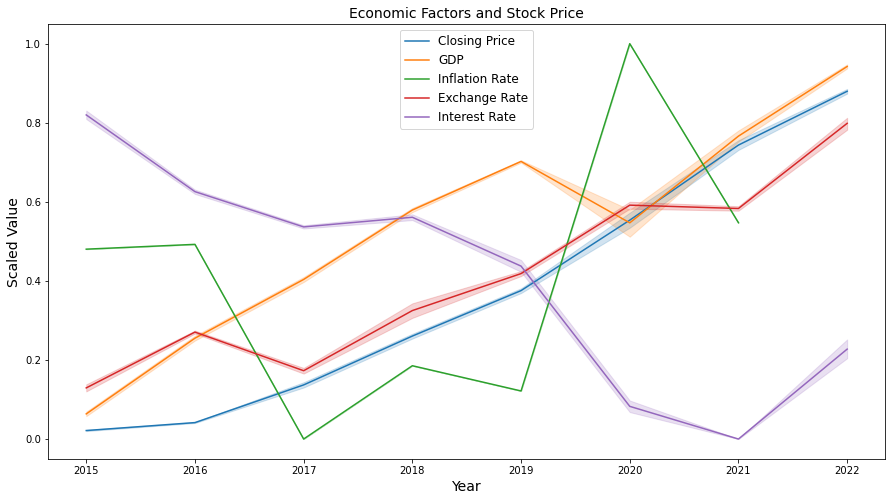

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (15,8))

sns.lineplot(x='Year', y='Close', data=stock_scaled, label = 'Closing Price')
sns.lineplot(x='Year', y='GDP', data=stock_scaled, label = 'GDP')
sns.lineplot(x='Year', y='InflationRate', data=stock_scaled, label = 'Inflation Rate')
sns.lineplot(x='Year', y='ExchangeRate', data=stock_scaled, label = 'Exchange Rate')
sns.lineplot(x='Year', y='InterestRate', data=stock_scaled, label = 'Interest Rate')
plt.title('Economic Factors and Stock Price', fontsize = 14)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Scaled Value',fontsize = 14)
plt.legend(loc ='best', fontsize = 12)
plt.show()

In [95]:
corr_df = stock.drop(['Date', 'Year', 'Month', 'Day'], axis = 1)
stock_corr = corr_df.corr()
stock_corr 

Open      High       Low     Close  Adj Close    Volume  \
Open           1.000000  0.999741  0.999739  0.999460   0.999453  0.072396   
High           0.999741  1.000000  0.999680  0.999799   0.999788  0.081515   
Low            0.999739  0.999680  1.000000  0.999773   0.999768  0.065801   
Close          0.999460  0.999799  0.999773  1.000000   0.999990  0.074473   
Adj Close      0.999453  0.999788  0.999768  0.999990   1.000000  0.073804   
Volume         0.072396  0.081515  0.065801  0.074473   0.073804  1.000000   
GDP            0.838838  0.837998  0.839307  0.838623   0.838553 -0.030511   
InflationRate  0.396561  0.399325  0.393469  0.395962   0.397260  0.351050   
ExchangeRate   0.884035  0.885224  0.883281  0.884294   0.885348  0.153797   
InterestRate  -0.823197 -0.824502 -0.821843 -0.823083  -0.822710 -0.244361   

                    GDP  InflationRate  ExchangeRate  InterestRate  
Open           0.838838       0.396561      0.884035     -0.823197  
High           0.837998       0.399325      0.885224     -0.824502  
Low            0.839307       0.393469      0.883281     -0.821843  
Close          0.838623       0.395962      0.884294     -0.823083  
Adj Close      0.838553       0.397260      0.885348     -0.822710  
Volume        -0.030511       0.351050      0.153797     -0.244361  
GDP            1.000000      -0.039227      0.734072     -0.684246  
InflationRate -0.039227       1.000000      0.522099     -0.479496  
ExchangeRate   0.734072       0.522099      1.000000     -0.701934  
InterestRate  -0.684246      -0.479496     -0.701934      1.000000

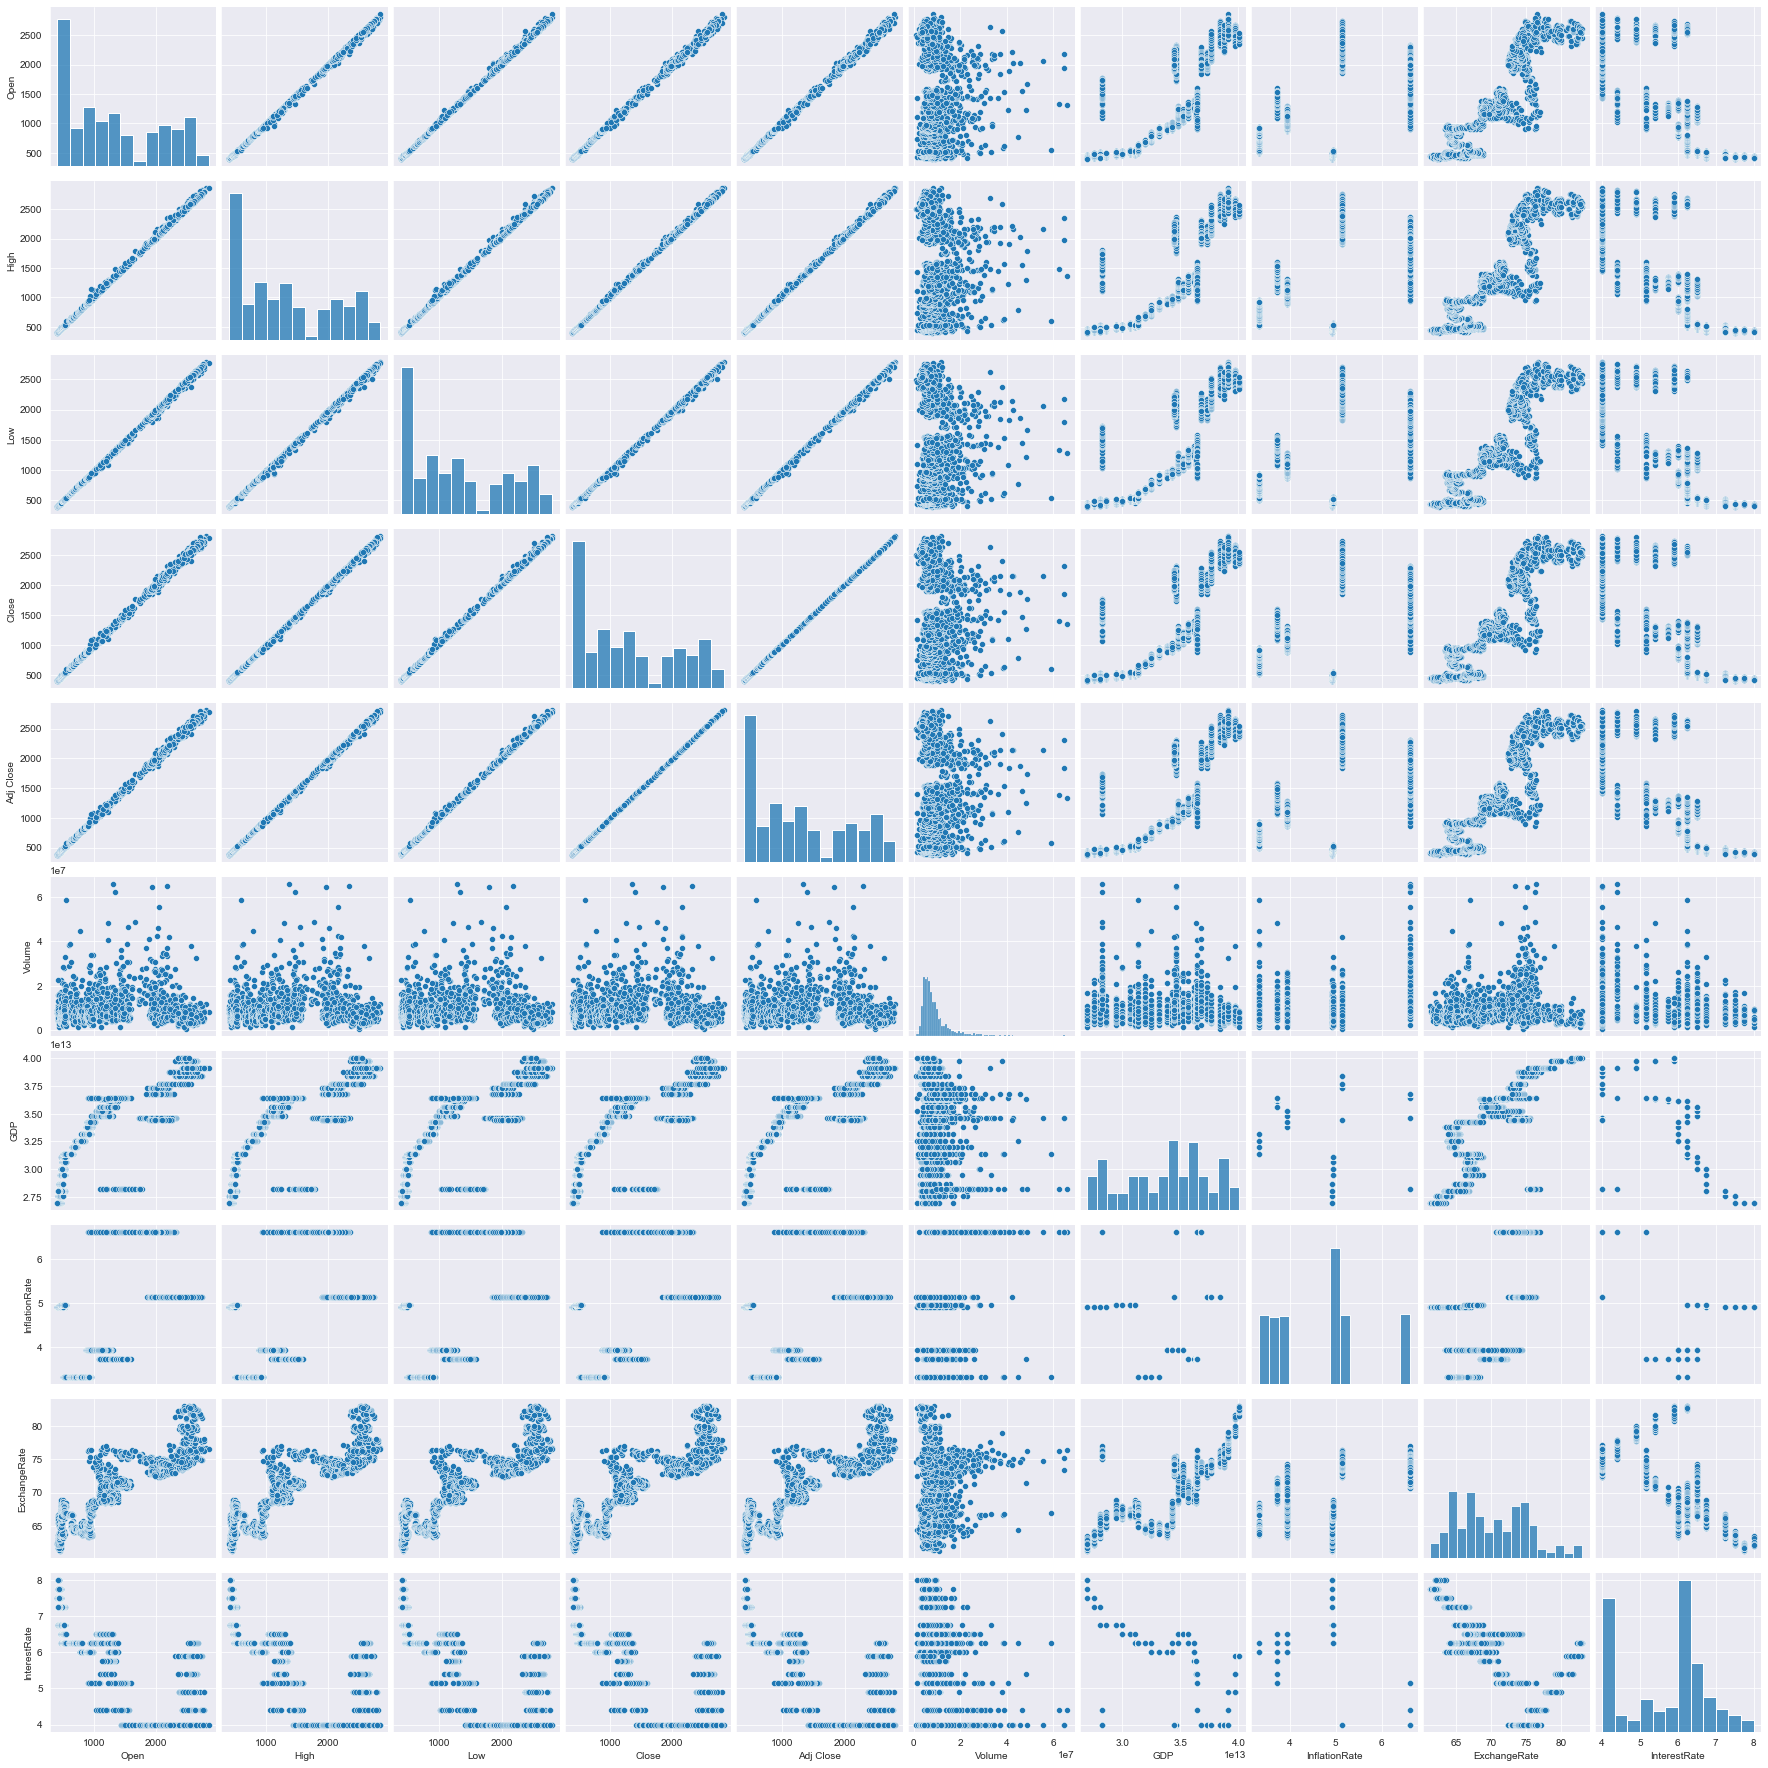

In [96]:
sns.set_style(style ='darkgrid')
sns.pairplot(corr_df)
plt.show()

In [97]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

    if dftest[1]> 0.05:
        print('Data is Non- Stationary')
    else:
        print('Data is Stationary')

#### Evaluate Null Data

#### 1. GDP

In [98]:
# Populating GDP of all the months 
GDP_graph = pd.DataFrame()
GDP_graph['Date'] = pd.to_datetime(GDP_edit[['Year','Month']].assign(day=1))
GDP_graph['GDP'] = GDP_edit['GDP']

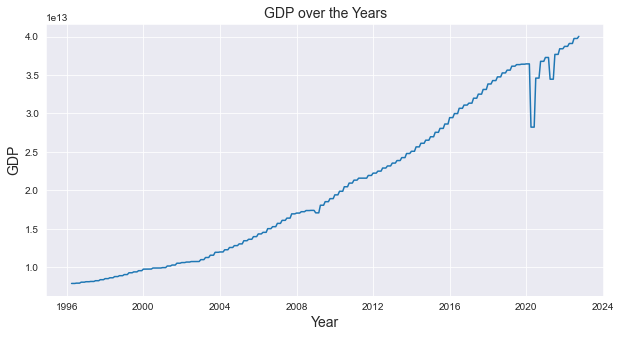

In [99]:
# GDP Graph over the Years
import matplotlib.pyplot as plt

plt.figure(figsize = (10,5))
plt.plot(GDP_graph['Date'],GDP_graph['GDP'])
plt.title('GDP over the Years', fontsize = 14)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('GDP',fontsize = 14)
plt.show()

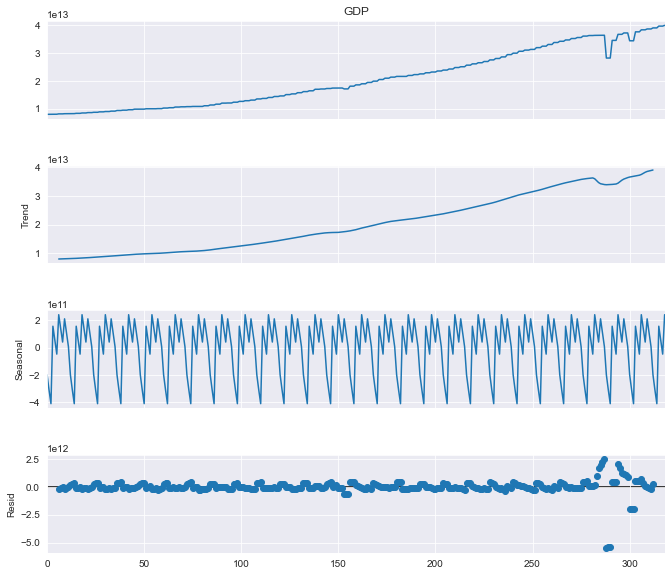

In [100]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_GDP = seasonal_decompose(GDP_graph['GDP'],period=12, model = 'additive')
fig = decompose_GDP.plot()
fig.set_size_inches((10, 9))

In [101]:
# Fill in the NaN values of GDP in stock
stock['GDP'].interpolate(inplace = True)
stock['GDP'].isnull().any()

False

In [102]:
adf_test(GDP['GDP'])

Results of Dickey-Fuller Test:
Test Statistic                   2.038499
p-value                          0.998721
#Lags Used                       3.000000
Number of Observations Used    103.000000
Critical Value (1%)             -3.495493
Critical Value (5%)             -2.890037
Critical Value (10%)            -2.581971
dtype: float64
Data is Non- Stationary


#### Test Statistic greater than critical value, p value greater than 0.05. Fail to reject null hypothesis. 
#### The GDP data is non-stationary

#### 2.Inflation Rate

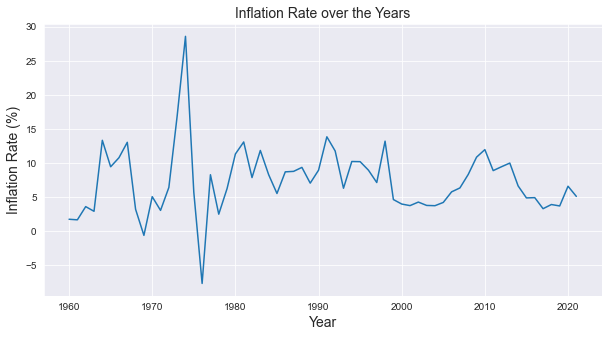

In [103]:
plt.figure(figsize = (10,5))
plt.plot(inflation_edit['Year'], inflation_edit['InflationRate'])
plt.title('Inflation Rate over the Years', fontsize = 14)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Inflation Rate (%)',fontsize = 14)
plt.show()

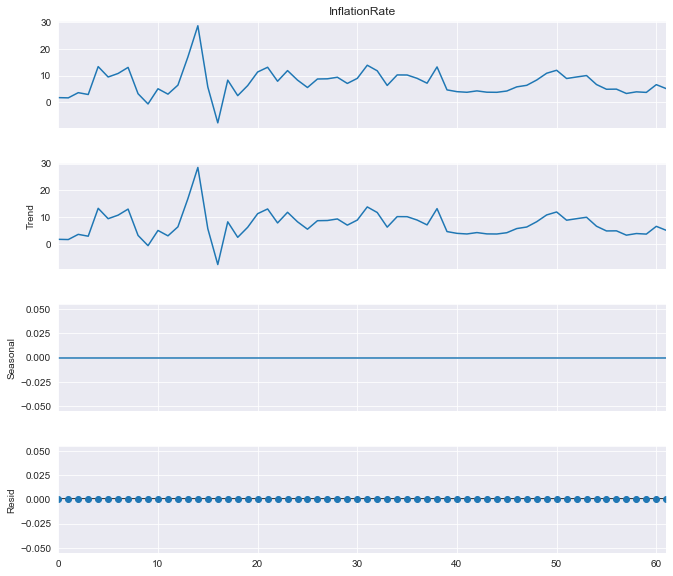

In [104]:
decompose_inflation = seasonal_decompose(inflation_edit['InflationRate'],period=1, model = 'additive')
fig = decompose_inflation.plot()
fig.set_size_inches((10, 9))

In [105]:
inflation_edit['InflationRate'].describe()

count    62.000000
mean      7.375878
std       4.908688
min      -7.633948
25%       4.068663
50%       6.644547
75%       9.883158
max      28.598734
Name: InflationRate, dtype: float64

In [106]:
inflation_edit['InflationRate'].median()

6.64454674748216

In [107]:
stock['InflationRate'].fillna(np.round(inflation_edit['InflationRate'].median(),2), inplace = True)

#### Mean is influenced by the outlier values. So choose median to fill in inflation rate for 2022

In [108]:
stock['InflationRate'].isnull().any()

False

In [109]:
adf_test(inflation['InflationRate'])

Results of Dickey-Fuller Test:
Test Statistic                 -5.252398
p-value                         0.000007
#Lags Used                      3.000000
Number of Observations Used    58.000000
Critical Value (1%)            -3.548494
Critical Value (5%)            -2.912837
Critical Value (10%)           -2.594129
dtype: float64
Data is Stationary


#### Test Statistic less than critical value, p value less than 0.05. Reject null hypothesis. 
#### The inflation data is stationary

#### 3.Exchange Rate

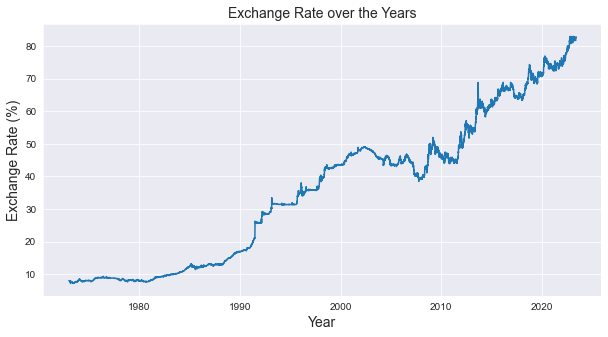

In [110]:
exchange_graph = pd.DataFrame()
plt.figure(figsize = (10,5))
exchange_graph['Date'] = pd.to_datetime(exchange_edit[['Year','Month','Day']])
plt.plot(exchange_graph['Date'], exchange_edit['ExchangeRate'])
plt.title('Exchange Rate over the Years', fontsize = 14)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Exchange Rate (%)',fontsize = 14)
plt.show()

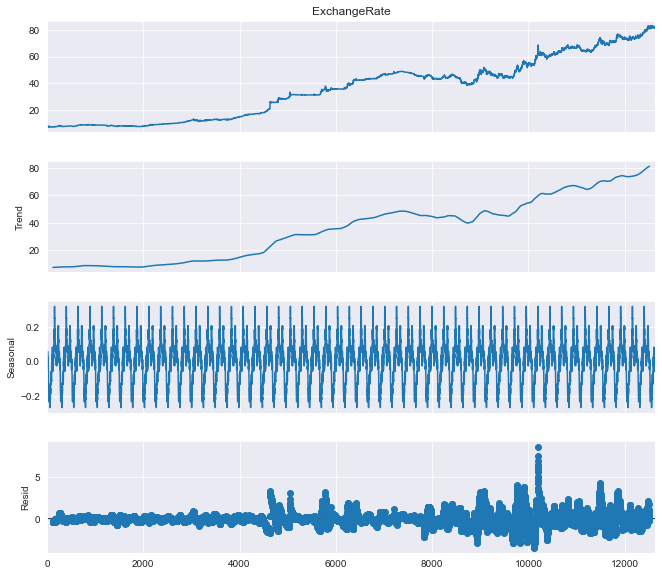

In [111]:
decompose_exchange = seasonal_decompose(exchange_edit['ExchangeRate'],period=245, model = 'additive')
fig = decompose_exchange.plot()
fig.set_size_inches((10, 9))

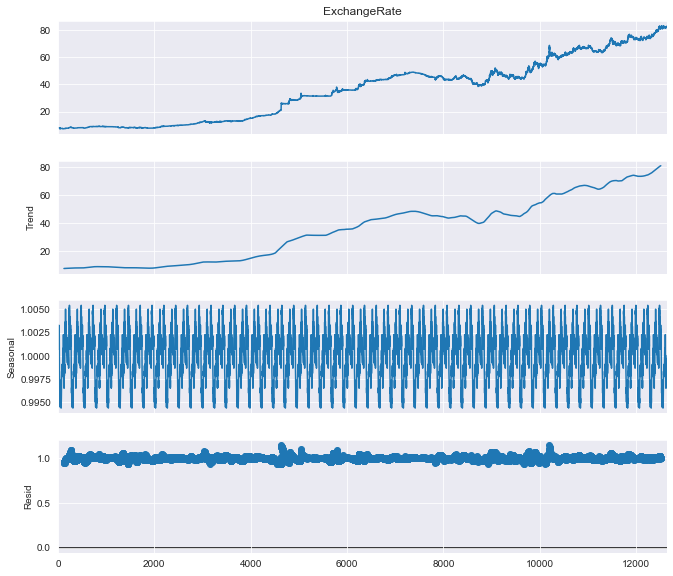

In [112]:
decompose_exchange_mul = seasonal_decompose(exchange_edit['ExchangeRate'],period=245, model = 'multiplicative')
fig = decompose_exchange_mul.plot()
fig.set_size_inches((10, 9))

In [113]:
# Find the month and year of the missing Exchange rate and fill it with the mean of the exchnage rates of that month and year
row_number = [i for i in stock[stock['ExchangeRate'].isnull()].index]

for i in row_number:
    temp_er = stock[(stock['Year'] == stock['Year'].iloc[i]) & (stock['Month']== stock['Month'].iloc[i])]['ExchangeRate']
    fill_value = np.round(temp_er[temp_er.notnull()].mean(),2)
    stock['ExchangeRate'].iloc[i]= fill_value

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [114]:
stock['ExchangeRate'].isnull().any()

False

In [115]:
stock.isnull().any()

Date             False
Year             False
Month            False
Day              False
Open             False
High             False
Low              False
Close            False
Adj Close        False
Volume           False
GDP              False
InflationRate    False
ExchangeRate     False
InterestRate     False
dtype: bool

In [116]:
adf_test(exchange['ExchangeRate'])

Results of Dickey-Fuller Test:
Test Statistic                     1.137878
p-value                            0.995527
#Lags Used                        41.000000
Number of Observations Used    12593.000000
Critical Value (1%)               -3.430869
Critical Value (5%)               -2.861770
Critical Value (10%)              -2.566892
dtype: float64
Data is Non- Stationary


#### Test Statistic greater than critical value, p value greater than 0.05. Fail to reject null hypothesis. 
#### The Exchange Rate data is non-stationary

#### 4.Interest Rate

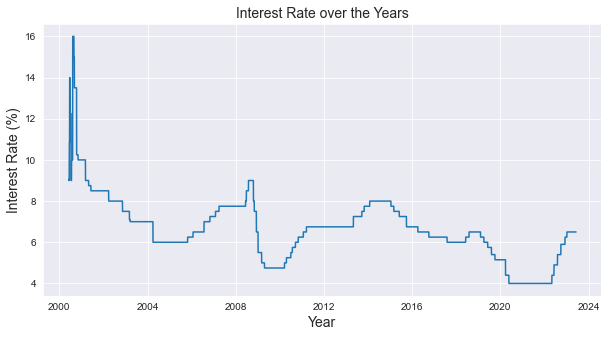

In [117]:
interest_graph = pd.DataFrame()
plt.figure(figsize = (10,5))
interest_graph['Date'] = pd.to_datetime(interest_edit[['Year','Month','Day']])
plt.plot(interest_graph['Date'], interest_edit['InterestRate'])
plt.title('Interest Rate over the Years', fontsize = 14)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Interest Rate (%)',fontsize = 14)
plt.show()

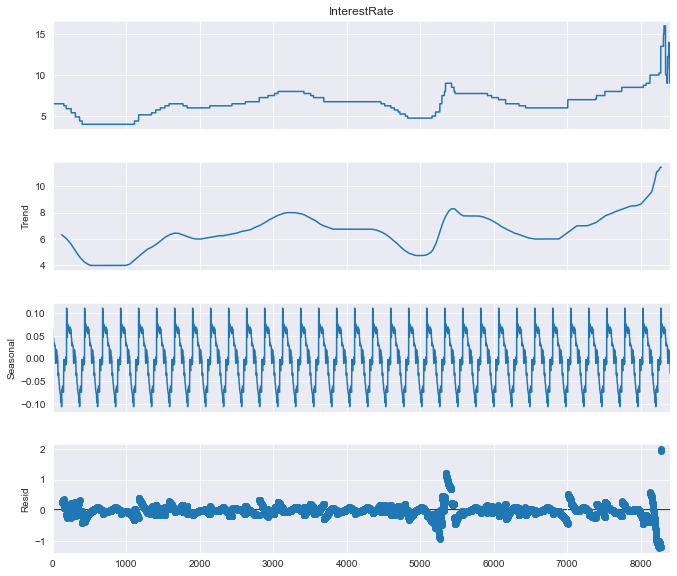

In [118]:
decompose_interest = seasonal_decompose(interest_edit['InterestRate'],period=245, model = 'additive')
fig = decompose_interest.plot()
fig.set_size_inches((10, 9))

In [119]:
adf_test(interest['InterestRate'])

Results of Dickey-Fuller Test:
Test Statistic                 -1.541706
p-value                         0.512789
#Lags Used                      2.000000
Number of Observations Used    90.000000
Critical Value (1%)            -3.505190
Critical Value (5%)            -2.894232
Critical Value (10%)           -2.584210
dtype: float64
Data is Non- Stationary


#### p value greater than 0.05. Fail to reject null hypothesis. 
#### The Interest Rate data is non-stationary

In [120]:
stock.isnull().any()

Date             False
Year             False
Month            False
Day              False
Open             False
High             False
Low              False
Close            False
Adj Close        False
Volume           False
GDP              False
InflationRate    False
ExchangeRate     False
InterestRate     False
dtype: bool

In [121]:
stock[stock.duplicated()].shape

(0, 14)

### Graphical EDA of Stock Market Data

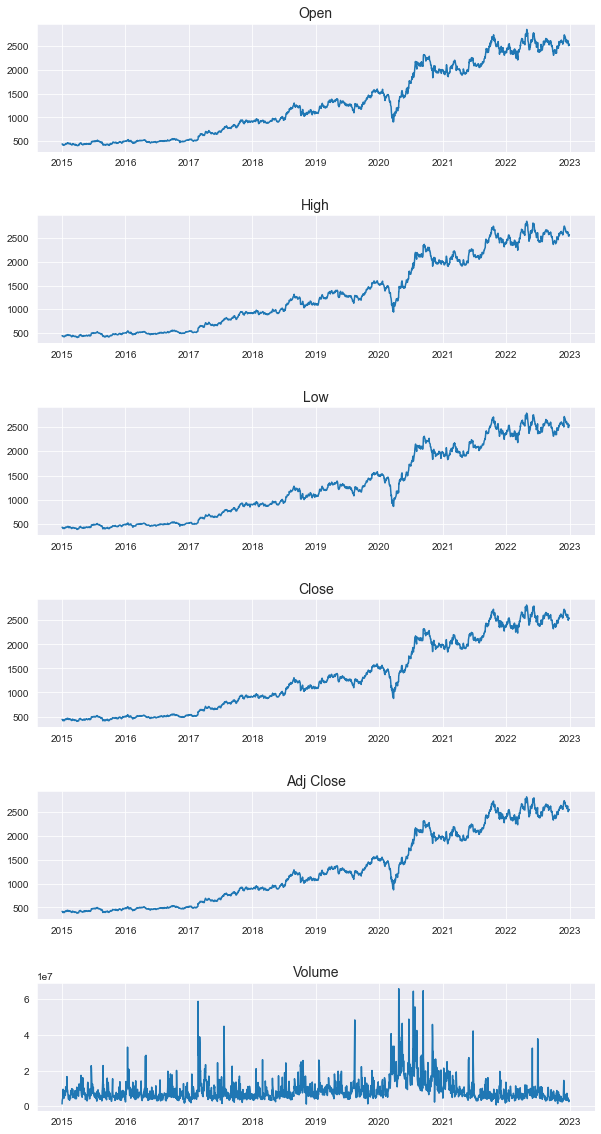

In [122]:
fig, ax = plt.subplots(6, figsize =  (10,20))
columns = ['Open', 'High', 'Low', 'Close', 'Adj Close','Volume']
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i in range(0,6):
    ax[i].plot(stock['Date'],stock[columns[i]])
    ax[i].set_title(columns[i], fontsize = 14)

#### Closing stock price decomposition plot

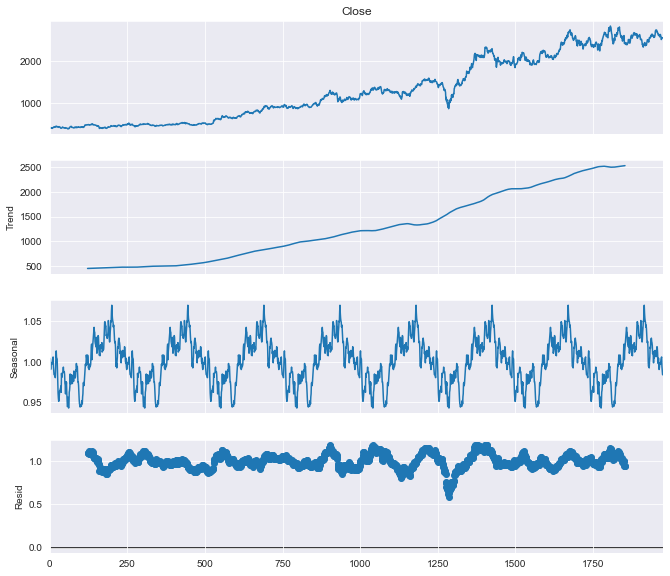

In [123]:
decompose_close_mul = seasonal_decompose(stock['Close'],period=245, model = 'multiplicative')
fig = decompose_close_mul.plot()
fig.set_size_inches((10, 9))

#### Variation in closing price in each year 

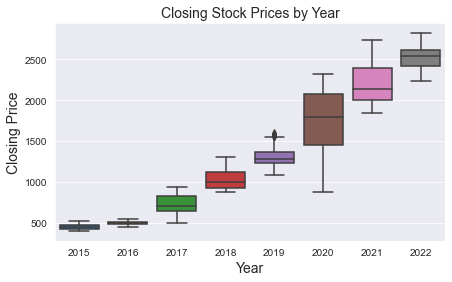

In [124]:
plt.figure(figsize = (7,4))
sns.boxplot(x='Year', y='Close', data=stock)
plt.title('Closing Stock Prices by Year',fontsize = 14)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Closing Price',fontsize = 14)
plt.show()

#### Volume Variation

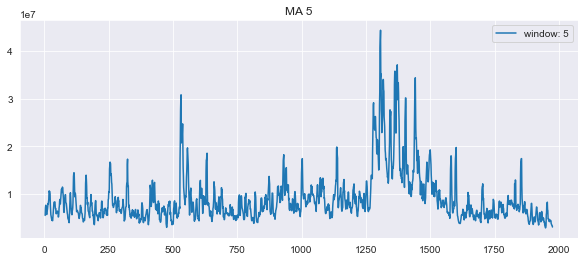

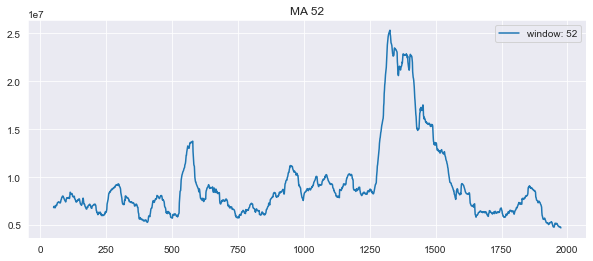

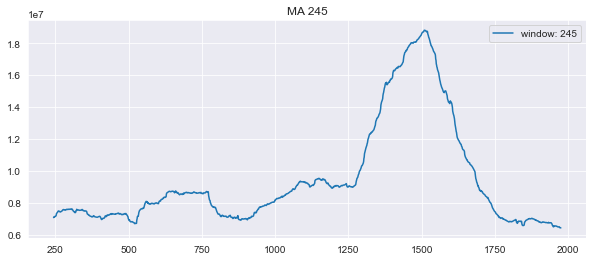

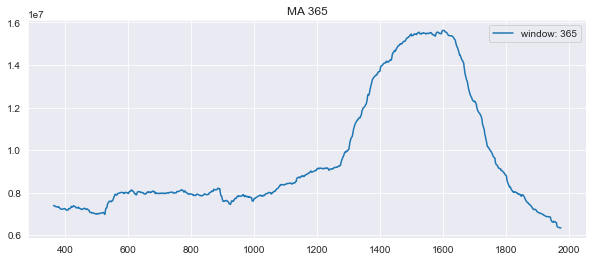

In [125]:
# Find moving average
for i in [5,52,245,365]:
    plt.figure(figsize=(10,4))
    stock["Volume"].rolling(i).mean().plot(label='window: '+str(i))
    plt.title("MA "+str(i))
    plt.legend(loc='best')
    plt.show()

#### There has been a sudden increase in the volume. We find the time of this increase 

In [126]:
stock.iloc[stock['Volume'].idxmax()]

Date               2020-04-22 00:00:00
Year                              2020
Month                                4
Day                                 22
Open                           1307.61
High                            1371.9
Low                            1287.79
Close                           1350.8
Adj Close                       1337.4
Volume                        65848350
GDP              28221533702571.601562
InflationRate                     6.62
ExchangeRate                     76.44
InterestRate                       4.4
Name: 1303, dtype: object

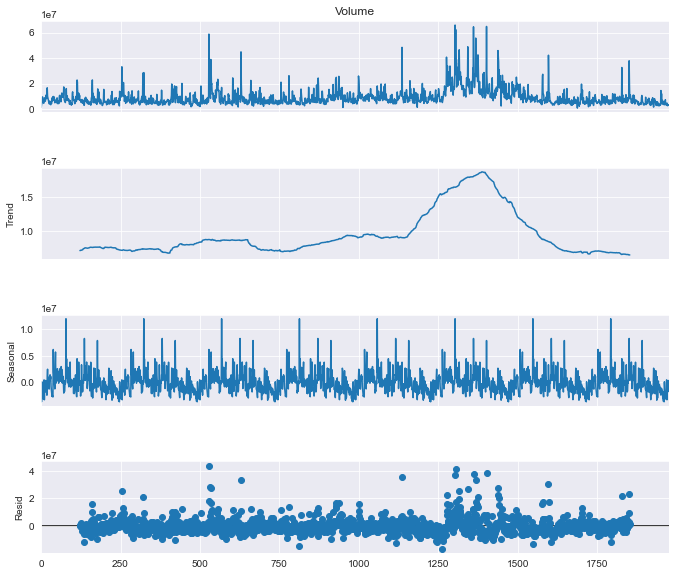

In [127]:
decompose_volume = seasonal_decompose(stock['Volume'],period=245, model = 'additive')
fig = decompose_volume.plot()
fig.set_size_inches((10, 9))

#### A look at closing price and volume compared by Year

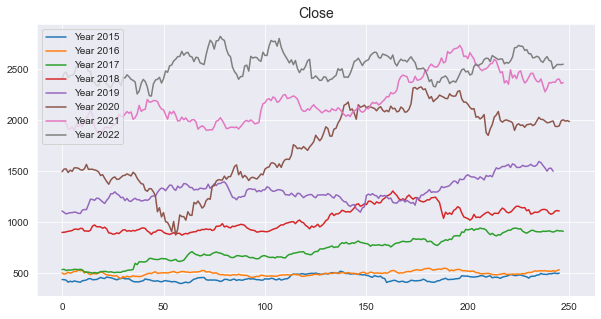

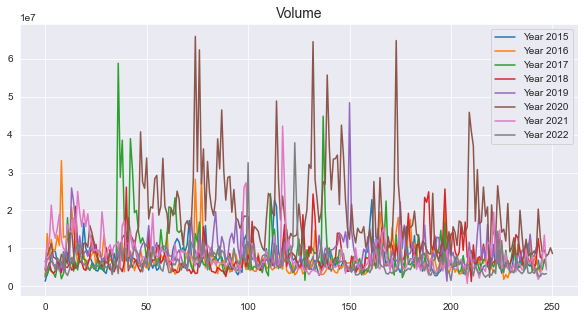

In [128]:
columns = ['Close','Volume']
for j in range (len(columns)):
    fig = plt.figure(figsize = (10,5))
    for i in range(start.year,end.year+1):
        data = stock.loc[stock['Year'] == i][columns[j]]
        plt.plot(data.reset_index(drop = True),label = ('Year '+str(i)))
    plt.legend(loc = 'best')
    plt.title(columns[j], fontsize = 14)
    plt.show()

#### Moving average closing price and volume compared by Year

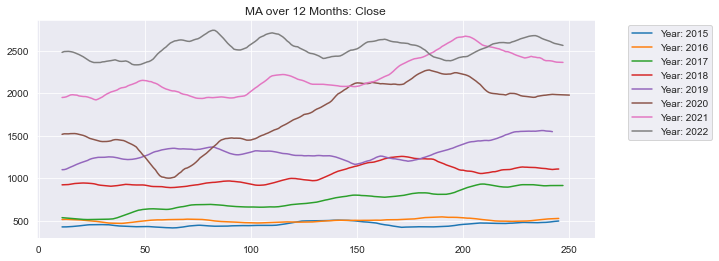

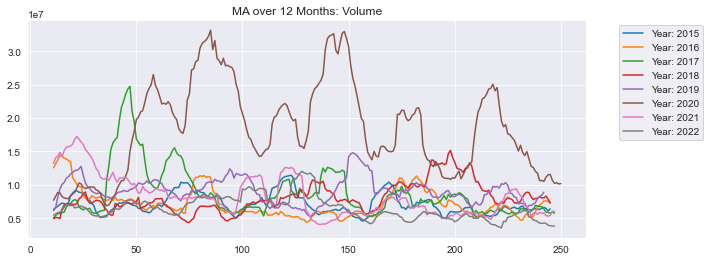

In [129]:
columns = ['Close','Volume']
for j in range (len(columns)):    
    plt.figure(figsize=(10,4))
    for i in range(start.year,end.year +1):
        data_ma = stock.loc[stock['Year'] == i][columns[j]].reset_index(drop = True)   
        data_ma.rolling(12).mean().plot(label='Year: '+str(i))
    plt.title("MA over 12 Months: " + columns[j] )
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.show()

#### Largest Variation in stock closing price has been in 2022

#### How the average closing price and volume have changed over the years 

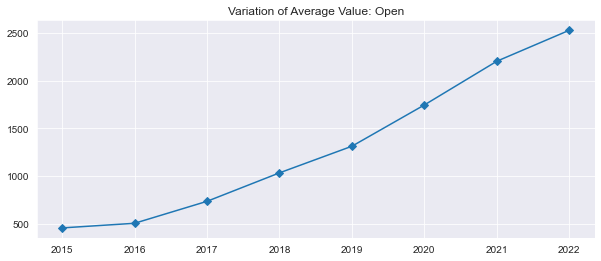

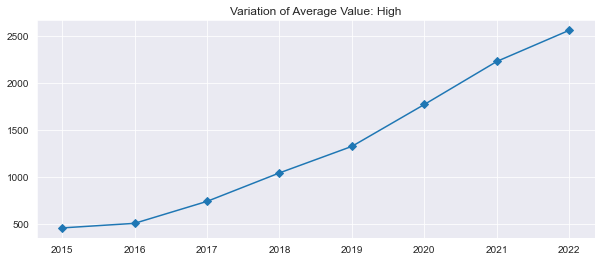

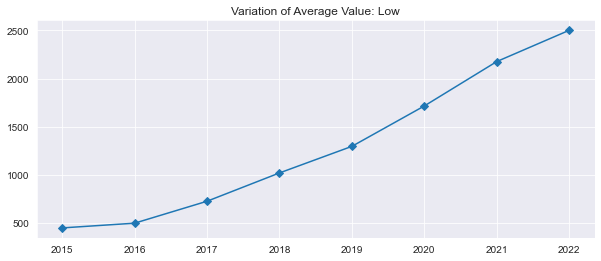

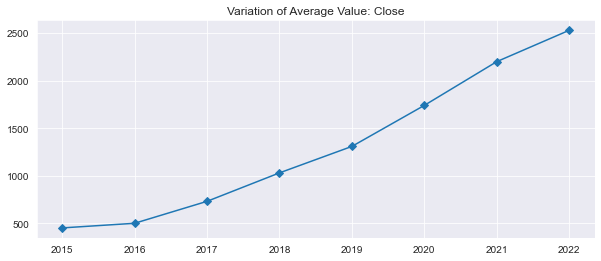

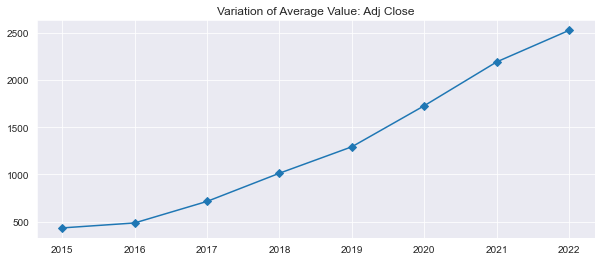

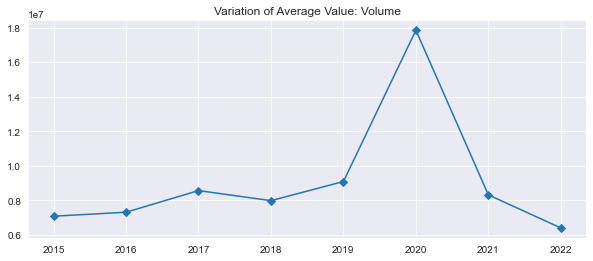

In [130]:
columns = ['Open', 'High', 'Low', 'Close', 'Adj Close','Volume']
for j in range (len(columns)):
    data_avg = list()
    plt.figure(figsize=(10,4))
    for i in range(start.year,end.year +1):
        data_avg.append(stock.loc[stock['Year'] == i][columns[j]].mean())   
    plt.plot(list(range(start.year,end.year +1)),data_avg, marker='D')
    plt.title("Variation of Average Value: " + columns[j] )
    plt.show()

#### There's a sudden increase in the volume of stocks traded in 2022. And then a drop. 

#### Variation of the difference in Opening and Closing price over the years

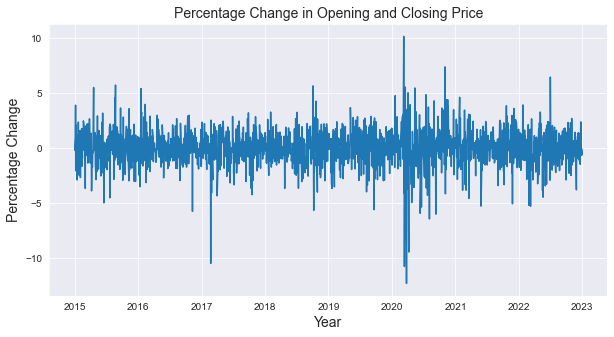

In [131]:
plt.figure(figsize = (10,5))
change = (stock['Open']-stock['Close'])/stock['Open']*100
plt.plot(stock['Date'],change)
plt.title('Percentage Change in Opening and Closing Price', fontsize = 14)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Percentage Change',fontsize = 14)
plt.show()

#### Max Gain  

In [132]:
change.max()

10.152961958955073

In [133]:
stock.iloc[change.idxmax()]

Date             2020-03-09 00:00:00
Year                            2020
Month                              3
Day                                9
Open                         1228.41
High                         1229.35
Low                          1084.72
Close                        1103.69
Adj Close                    1092.74
Volume                      40698294
GDP                 36444410654140.5
InflationRate                   6.62
ExchangeRate                   74.21
InterestRate                    5.15
Name: 1276, dtype: object

#### Max Loss

In [134]:
change.min()

-12.290128305839216

In [135]:
stock.iloc[change.idxmin()]

Date             2020-03-25 00:00:00
Year                            2020
Month                              3
Day                               25
Open                          954.75
High                         1140.74
Low                           954.21
Close                        1072.09
Adj Close                    1061.46
Volume                      33749620
GDP                 36444410654140.5
InflationRate                   6.62
ExchangeRate                   76.36
InterestRate                    5.15
Name: 1287, dtype: object

#### Change in Value of the stock over the years considering it was bought on the start day

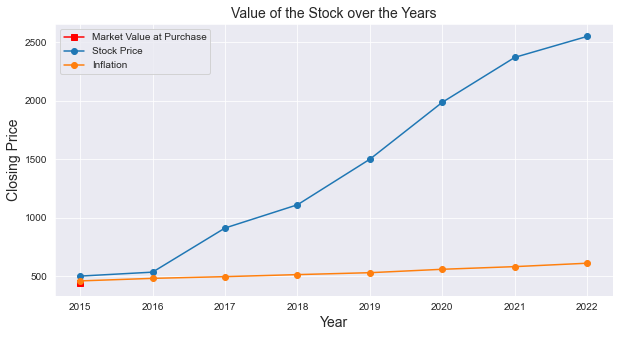

In [136]:
value = list()
cum_inflation = list()
total = list()
value_inflation = list()
buy = stock.loc[stock['Year'] == start.year]['Close'].iloc[0]
j = 0
for i in range(start.year, end.year+1):
    value.append(stock.loc[stock['Year'] == i]['Close'].iloc[-1])
    cum_inflation.append(stock.loc[stock['Year'] == i]['InflationRate'].iloc[-1])
    total.append(sum(cum_inflation)) # Inflation after each year
    value_inflation.append(buy*(1+total[j]/100))
    j = j+1

plt.figure(figsize = (10,5))
plt.plot(start.year, buy, marker = 's', color = 'r', label = 'Market Value at Purchase')
plt.plot(list(range(start.year, end.year +1)),value, marker = 'o', label = 'Stock Price')
plt.plot(list(range(start.year, end.year +1)),value_inflation, marker = 'o', label = 'Inflation')
plt.title('Value of the Stock over the Years', fontsize = 14)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Closing Price',fontsize = 14)
plt.legend(loc= 'best')
plt.show()

## Augmented Dickey Fuller Test for Stock Market Data 

In [137]:
columns = ['Open', 'High', 'Low', 'Close', 'Adj Close','Volume']
for i in columns:
    adf_test(stock[i])
    print('The above are the results for:',i,'\n')

Results of Dickey-Fuller Test:
Test Statistic                   -0.432530
p-value                           0.904524
#Lags Used                        0.000000
Number of Observations Used    1975.000000
Critical Value (1%)              -3.433665
Critical Value (5%)              -2.863005
Critical Value (10%)             -2.567550
dtype: float64
Data is Non- Stationary
The above are the results for: Open 

Results of Dickey-Fuller Test:
Test Statistic                   -0.388938
p-value                           0.911929
#Lags Used                        1.000000
Number of Observations Used    1974.000000
Critical Value (1%)              -3.433667
Critical Value (5%)              -2.863005
Critical Value (10%)             -2.567550
dtype: float64
Data is Non- Stationary
The above are the results for: High 

Results of Dickey-Fuller Test:
Test Statistic                   -0.361918
p-value                           0.916266
#Lags Used                       26.000000
Number of Observations

#### We see that stock market prices- open, high, low, close, adj close and, GDP exchange rate and interest rate is all non-staionary data 
#### Volume and inflation rate are the only stationary data

## ARIMA Model Generation

### Visualization of Differencing and Transforming the data to make it Stationary

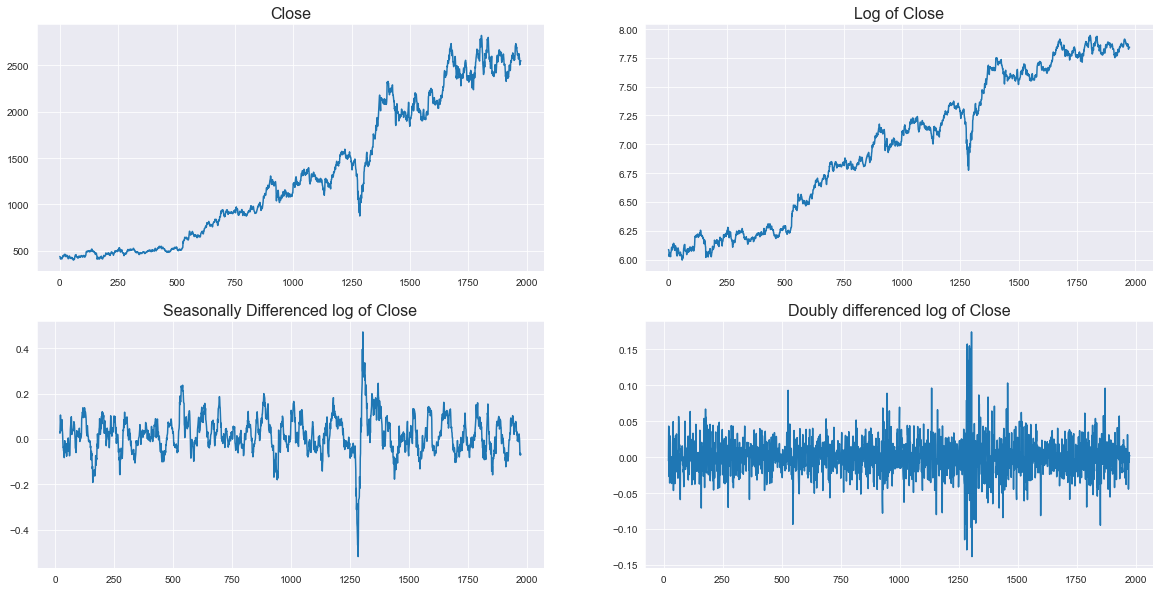

In [138]:
close_log = pd.DataFrame() 
close_log_diff = pd.DataFrame() 
close_log_diff_double = pd.DataFrame()

close_log['Close'] = np.log(stock['Close']) # Calculate log of Close 
close_log_diff['Close'] = (close_log['Close'].diff(periods = 20)).dropna() # Seasonal Differencing
close_log_diff_double['Close'] = (close_log_diff['Close'].diff(periods = 1)).dropna() # First difference of the seasinay difference to nake data staionary

fig, ax = plt.subplots(2,2, figsize=(20, 10))
ax[0,0].plot(stock['Close'])
ax[0,0].set_title('Close', fontsize = 16)

ax[0,1].plot(close_log)
ax[0,1].set_title('Log of Close', fontsize = 16)

ax[1,0].plot(close_log_diff)
ax[1,0].set_title('Seasonally Differenced log of Close', fontsize = 16)

ax[1,1].plot(close_log_diff_double)
ax[1,1].set_title('Doubly differenced log of Close', fontsize = 16)

plt.show()

### Calculating log values of the Data 

In [139]:
stock_log = pd.DataFrame()
stock_log_diff = pd.DataFrame()

col = stock.columns
col = col.drop(['Date','Year', 'Month', 'Day', 'Volume', 'InflationRate'])

for i in col:
    stock_log[i] = np.log(stock[i])

### Differencing Log Values using Lag 5

In [142]:
lag = 30
for i in col:    
#     stock_log_diff = ((stock_log.diff(periods = 30)).diff(periods =1)).dropna() # sesonal and doubly
    stock_log_diff = stock_log.diff(periods = lag).dropna() 

#### Augmented Dickey Fuller Test on the Differenced and Transformed Data to check for Stationarity

In [143]:
for i in stock_log_diff.columns:
    adf_test(stock_log_diff[i])
    print('The above are the results for:',i,'\n')

Results of Dickey-Fuller Test:
Test Statistic                -7.794700e+00
p-value                        7.773570e-12
#Lags Used                     1.400000e+01
Number of Observations Used    1.931000e+03
Critical Value (1%)           -3.433741e+00
Critical Value (5%)           -2.863038e+00
Critical Value (10%)          -2.567567e+00
dtype: float64
Data is Stationary
The above are the results for: Open 

Results of Dickey-Fuller Test:
Test Statistic                -8.868586e+00
p-value                        1.418145e-14
#Lags Used                     2.600000e+01
Number of Observations Used    1.919000e+03
Critical Value (1%)           -3.433762e+00
Critical Value (5%)           -2.863047e+00
Critical Value (10%)          -2.567572e+00
dtype: float64
Data is Stationary
The above are the results for: High 

Results of Dickey-Fuller Test:
Test Statistic                -9.013552e+00
p-value                        6.034920e-15
#Lags Used                     2.600000e+01
Number of Obser

#### All the data is now stationary 

### ACF and PACF Plots

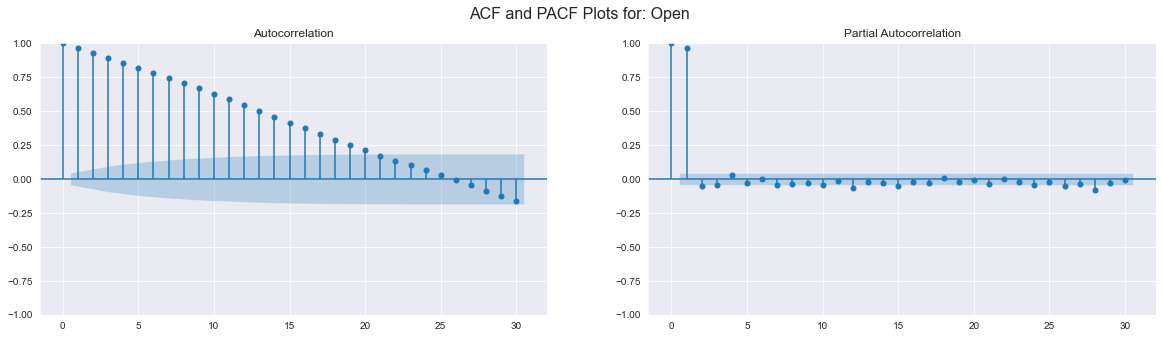

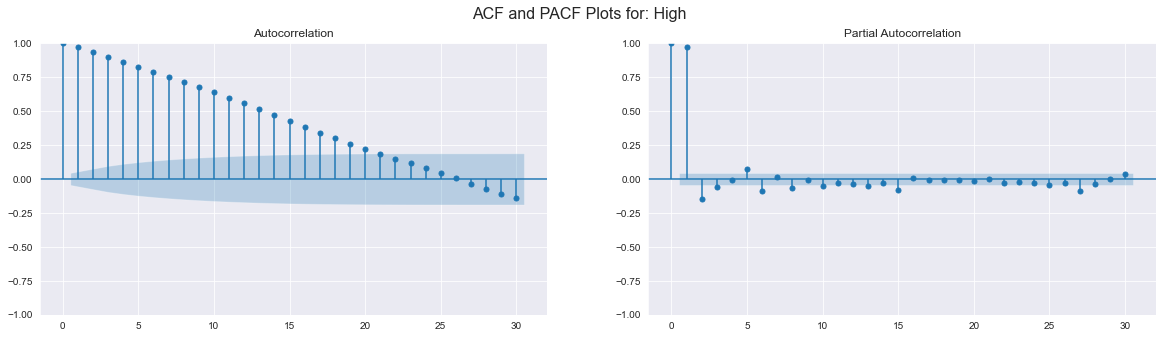

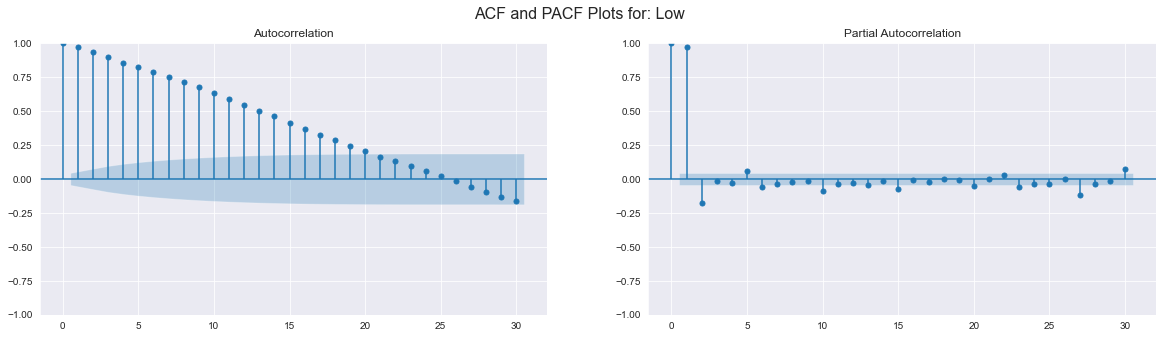

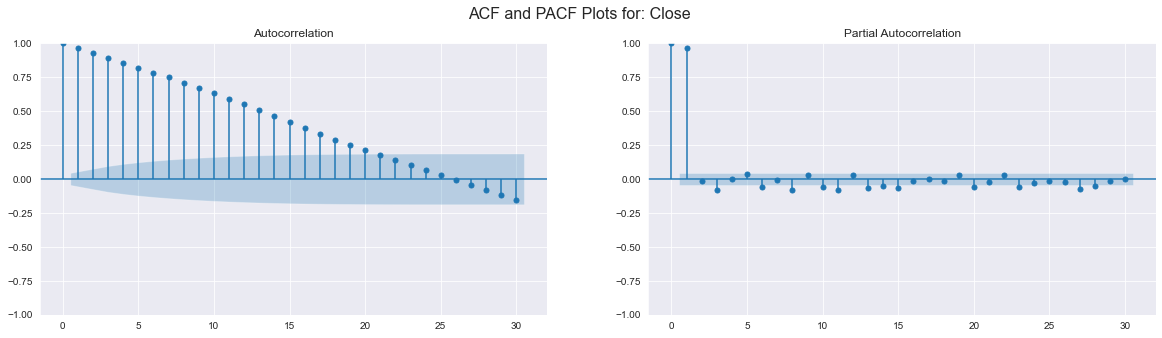

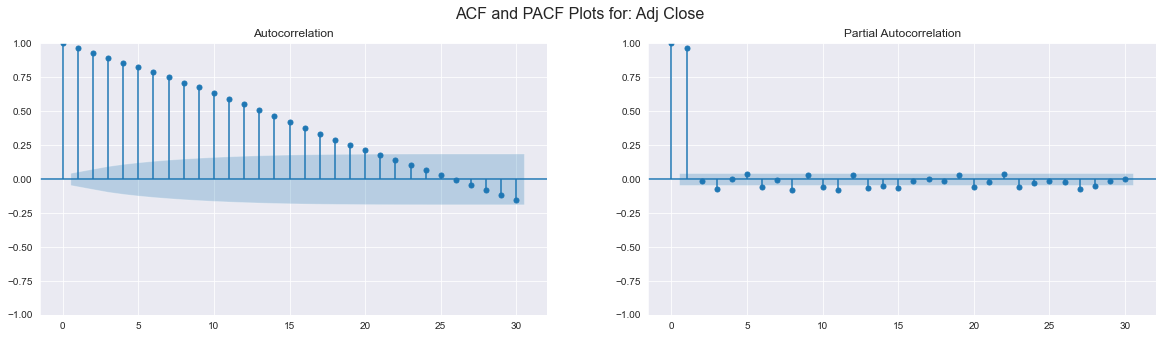

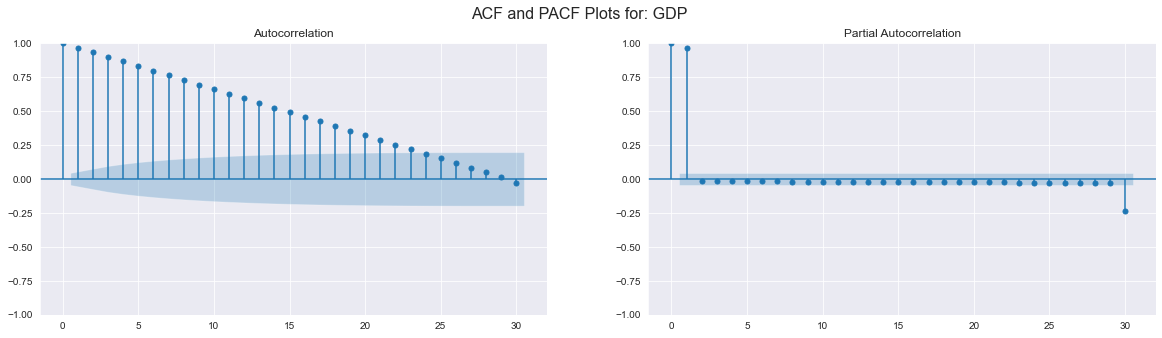

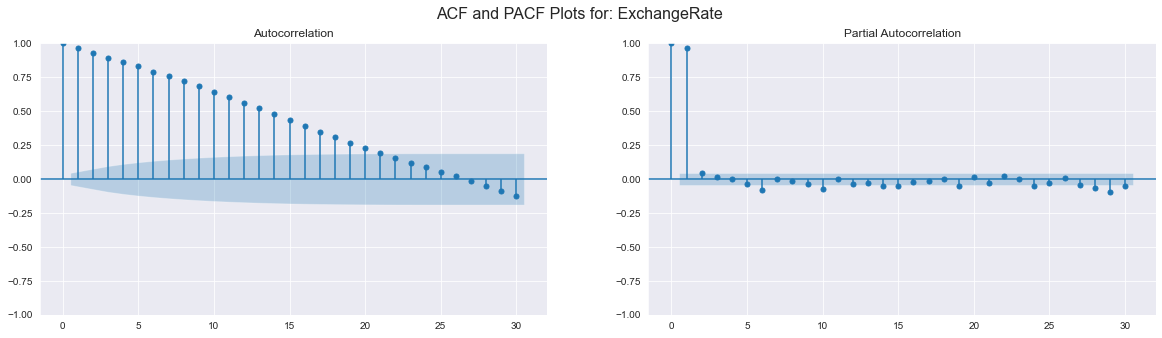

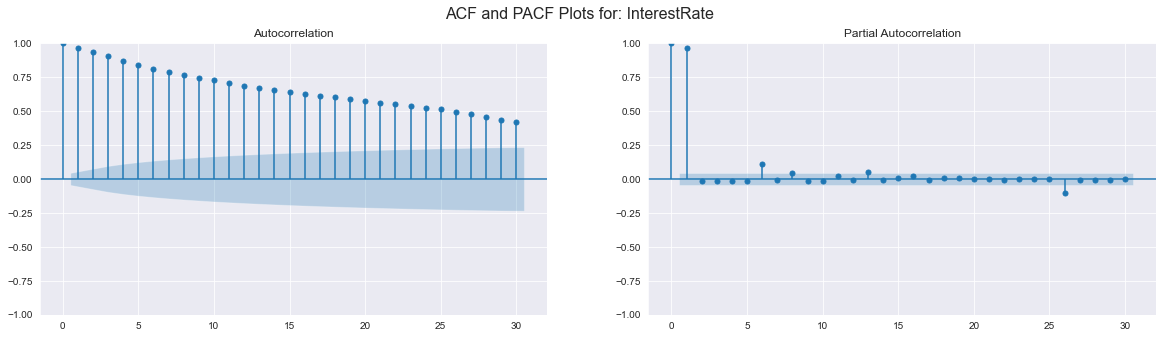

In [144]:
import statsmodels.graphics.tsaplots as tsa_plots
columns = stock_log_diff.columns
for i in columns:
    fig, ax = plt.subplots(1,2, figsize=(20, 5))
    tsa_plots.plot_acf(stock_log_diff[i],lags=30, ax = ax[0])
    tsa_plots.plot_pacf(stock_log_diff[i],lags= 30, ax = ax[1])
    fig.suptitle('ACF and PACF Plots for: %s'%i, fontsize = 16 )
    plt.show()

### Auto ARIMA to find the order for ARIMA model

In [145]:
import warnings
warnings.filterwarnings("ignore")

In [146]:
from pmdarima import auto_arima

col = ['Open', 'High', 'Low', 'Close', 'Adj Close']
order_list = list()
aic_list = list()

for i in col:
    model_stock_log_diff = auto_arima(stock_log_diff[i], trace = True, suppress_warning = True) # for differenced log values
    aic_list.append(model_stock_log_diff.aic())  # assign best AIC value to corresponding column  
    order_list.append(model_stock_log_diff.order) # assign orderof best AIC value to corresponding column 
#     order_df[i]= model_stock_log_diff.get_params().get("order") # cal also be written this way
#     model_stock_log_diff.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-8620.616, Time=3.67 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-3426.967, Time=0.31 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-8613.706, Time=0.34 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-5421.762, Time=1.00 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-3287.932, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-8619.369, Time=0.66 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-8621.876, Time=0.74 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-8616.466, Time=0.62 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-8616.943, Time=1.04 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-8619.232, Time=0.90 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-8619.015, Time=0.85 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-8612.215, Time=2.33 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-8625.849, Time=0.16 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-8615.772, Time=0.59 sec
 ARIMA(2,0,0)(0,0,0

In [147]:
# Arima Order for the columns - Open, High, Low, Close and Adj CLose
order_list

[(2, 0, 1), (2, 0, 3), (2, 0, 0), (1, 0, 2), (1, 0, 2)]

In [148]:
# AIC for the columns - Open, High, Low, Close and Adj CLose using the above Arima order
aic_list

[-8625.849354939692,
 -9217.063783754093,
 -9012.289517921523,
 -8651.485078737336,
 -8647.440723864733]

### Apply the order generated by Auto ARIMA to each of the features

#### 1. Define Evaluation Metric MAPE (Mean Absolute Percentage Error)

In [149]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

#### 2. Define ARIMA model function to find RMSE, MAPE and Predictions

In [150]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt 

def evaluate_arima_model(X,arima_order):
#     split = int(len(X)*0.8)
#     train, test = X[0:split], X[split:]
    split = -30
    train, test = X[0:split], X[split:] # Using last 'split' values as test data
    history = [i for i in train]
    pred = list()
    
    for k in range(len(test)):
        model = ARIMA(history, order = arima_order).fit()
        yhat = model.forecast()[0]
        pred.append(yhat)
        history.append(test[k])
        
    rmse = sqrt(mean_squared_error(test, pred))
    mape = MAPE(pred, test)
    return[rmse, mape,pred]

#### 3. Run the ARIMA model for each Feature in the dataset

In [151]:
col = ['Open', 'High', 'Low', 'Close', 'Adj Close']
rmse_result = list()
mape_result = list()
predictions = pd.DataFrame()

for i in col:
    model_result = evaluate_arima_model(stock_log_diff[i].values,order_list[col.index(i)])
    rmse_result.append(np.round(model_result[0],4))
    mape_result.append(np.round(model_result[1],4))
    predictions[i] = np.round(model_result[2],4)

#### 4. Plot graphs to compare predictions with test values 

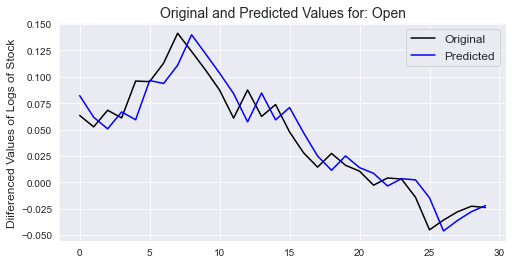

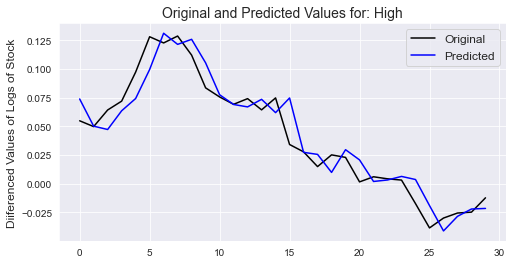

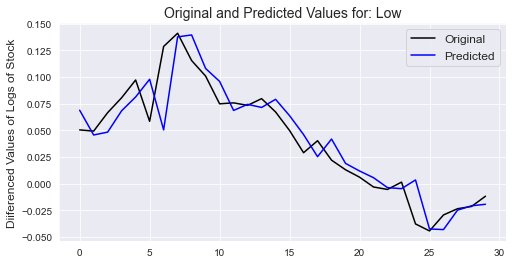

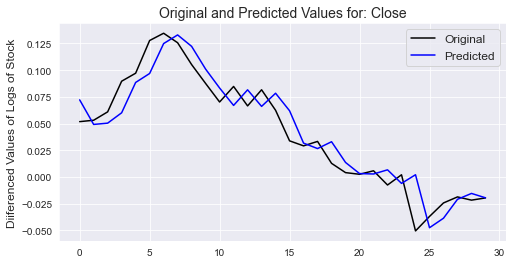

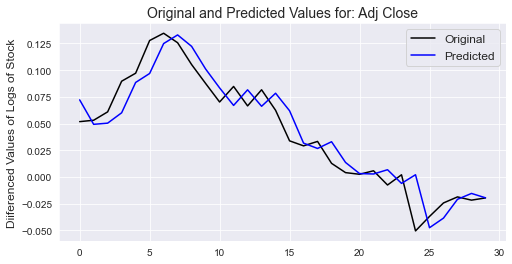

In [152]:
col = ['Open', 'High', 'Low', 'Close', 'Adj Close']

for i in col:
    plt.figure(figsize=(8,4))
    plt.plot(stock_log_diff[i].iloc[-len(predictions):].reset_index(drop = True), color = 'black', label = 'Original')
    plt.plot(predictions[i], color = 'blue', label = 'Predicted')
    plt.ylabel('Diiferenced Values of Logs of Stock', fontsize = 12)
    plt.title('Original and Predicted Values for: %s'%i, fontsize = 14)
    plt.legend(loc = 'best', fontsize = 12)
    plt.show()

#### 5. Forecasting for a Day, a Week and a Month  

#### 5.1 Define an ARIMA model function to forecast stock prices

In [153]:
def forecast_arima_model(X,arima_order,forecast_days):

    history = [i for i in X]
    forecast = list()
    
    for k in range(forecast_days):
        model = ARIMA(history, order = arima_order).fit()
        yhat = model.forecast()[0]
        forecast.append(yhat)
        history.append(forecast[k])
        
    return forecast

In [154]:
col = ['Open', 'High', 'Low', 'Close', 'Adj Close']

forecast_df = pd.DataFrame()

days = 30
for i in col:
    result_forecast = forecast_arima_model(stock_log_diff[i].values,order_list[col.index(i)], days)
    forecast_df[i] = result_forecast
        
# # This also provides same result
# for i in col:
#     model = ARIMA(stock_log_diff[i].values,order = order_list[col.index(i)]).fit()
#     fore_arima = model.forecast(steps = days)
#     forecast_df[i] = fore_arima    
    

#### 6. Reversing the Differenced Log Values of Predictions and Forecast

#### 6.1 Reversing differencing and log for Predictioons

In [155]:
col = ['Open', 'High', 'Low', 'Close', 'Adj Close']

temp_log = stock_log[['Open', 'High', 'Low', 'Close', 'Adj Close']] # Copy only values of these columns
predictions_indexed = pd.DataFrame()

original_stock_log = temp_log.iloc[-len(predictions)-lag:-lag] # required for reverse differencing
# there is a lag of 5, so in differencing last 5 values of stock_log will not be used in generating stock_log_diff
# last 10 values of stock_log_diff are used for prediction, there fore the stock_log used in stock_log_diff starts at (-10-5)

# Reverse Differencing of predictions 
for i in col:
    rev_diff_temp = list() # temporarily store reverse differenced values
    for j in range(len(predictions)):
        rev_diff_temp.append(predictions[i].iloc [j]+ original_stock_log[i].iloc [j])
    predictions_indexed[i]= rev_diff_temp 

# Reverse Log of predictions 
predictions_indexed = np.exp(predictions_indexed)  

# Re-indexing predictions 
indexing = pd.Index(range(len(stock)-len(predictions),len(stock)))
predictions_indexed.set_index(indexing, inplace = True)

# Adding Date Column to predictions 
date_df = pd.DataFrame()
date_df['Date'] = stock['Date'].iloc[-len(predictions):] 
predictions_indexed.insert(0,'Date', date_df['Date'])

#### 6.1.2 RMSE and MAPE of the Predicted Values 

In [156]:
col = ['Open', 'High', 'Low', 'Close', 'Adj Close']
rmse_list = list()
mape_list = list()

for i in col:
    rmse_list.append(sqrt(mean_squared_error(stock[i].iloc[-len(predictions):], predictions_indexed[i])))
    mape_list.append(MAPE(predictions_indexed[i], stock[i].iloc[-len(predictions):]))

error_df = pd.DataFrame({'RMSE': np.round(rmse_list,2), 'MAPE' : np.round(mape_list,2)}, index = ['Open', 'High', 'Low', 'Close', 'Adj Close'])
print('\033[1m'+ 'RMSE and MAPE for Predictions using ARIMA Model')
error_df

RMSE and MAPE for Predictions using ARIMA Model


RMSE  MAPE
Open       46.10  1.50
High       39.45  1.16
Low        54.53  1.43
Close      45.24  1.36
Adj Close  45.24  1.36

#### 6.2 Reversing differencing and log for Forecast

In [157]:
col = ['Open', 'High', 'Low', 'Close', 'Adj Close']

# log_add = stock_log[['Open', 'High', 'Low', 'Close', 'Adj Close']].iloc[-5:] # log of original data
forecast_indexed = pd.DataFrame()

# Reverse Differencing of Forecast
for i in col:
    add_term = [k for k in stock_log[i].iloc[-lag:]] #lag is 5
    rev_diff_fc = list()
    for j in range(len(forecast_df)):        
        rev_diff_fc.append(forecast_df[i].iloc[j]+ add_term[j]) # reversed difference of forecast
        add_term.append(rev_diff_fc[j])
    forecast_indexed[i] = rev_diff_fc
    
# Reverse Log of Forecast 
forecast_indexed = np.exp(forecast_indexed)

# Re-indexing Forecast 
indexing_fc = pd.Index(range(len(stock),len(stock)+len(forecast_df)))
forecast_indexed.set_index(indexing_fc, inplace = True)

# Adding Date Column to predictions 
date_df_fc = pd.DataFrame()
date_df_fc['Date'] = pd.date_range(stock['Date'].iloc[-1], periods = days+1, freq = 'B')
date_df_fc.drop(date_df_fc.index[0], inplace = True) # includes start date, so we drop it
date_df_fc.set_index(indexing_fc, inplace = True) # reset the index to start after the last date of stock dataframe
forecast_indexed.insert(0,'Date', date_df_fc['Date'])

#### 6.2.1 Forecast Values for Different Periods of Time

In [158]:
print('\033[1m'+ 'Forecast for One Day:')
forecast_indexed.head(1)

Forecast for One Day:


Date         Open         High          Low       Close  \
1976 2023-01-02  2528.828283  2562.532701  2520.992533  2504.98393   

        Adj Close  
1976  2505.044806

In [159]:
print('\033[1m'+ 'Forecast for One Week:')
forecast_indexed.head(5)

Forecast for One Week:


Date         Open         High          Low        Close  \
1976 2023-01-02  2528.828283  2562.532701  2520.992533  2504.983930   
1977 2023-01-03  2489.380998  2549.520794  2518.836174  2523.717457   
1978 2023-01-04  2521.823845  2563.768835  2538.184540  2520.490589   
1979 2023-01-05  2517.099741  2582.330538  2537.613377  2546.717636   
1980 2023-01-06  2544.087576  2617.240989  2574.716049  2589.106427   

        Adj Close  
1976  2505.044806  
1977  2523.824610  
1978  2520.646401  
1979  2546.923540  
1980  2589.364167

In [160]:
print('\033[1m'+ 'Forecast for One Month:')
forecast_indexed

Forecast for One Month:


Date         Open         High          Low        Close  \
1976 2023-01-02  2528.828283  2562.532701  2520.992533  2504.983930   
1977 2023-01-03  2489.380998  2549.520794  2518.836174  2523.717457   
1978 2023-01-04  2521.823845  2563.768835  2538.184540  2520.490589   
1979 2023-01-05  2517.099741  2582.330538  2537.613377  2546.717636   
1980 2023-01-06  2544.087576  2617.240989  2574.716049  2589.106427   
1981 2023-01-09  2568.341950  2716.367342  2497.951118  2682.413729   
1982 2023-01-10  2666.978490  2730.866626  2692.849178  2691.185512   
1983 2023-01-11  2680.786895  2747.799685  2700.131189  2714.208447   
1984 2023-01-12  2715.333983  2760.853474  2720.922495  2710.052759   
1985 2023-01-13  2709.319171  2756.807092  2708.336326  2712.591538   
1986 2023-01-16  2696.840339  2728.484023  2688.375315  2676.510021   
1987 2023-01-17  2654.927276  2711.294227  2673.887005  2687.587231   
1988 2023-01-18  2680.027911  2711.960366  2657.401061  2651.083926   
1989 2023-01-19  2660.691815  2684.292103  2657.692927  2652.859011   
1990 2023-01-20  2652.283657  2681.702209  2621.413254  2615.509764   
1991 2023-01-23  2596.464581  2646.694701  2606.557330  2622.260208   
1992 2023-01-24  2628.947172  2659.002182  2630.489708  2636.840141   
1993 2023-01-25  2658.345527  2667.071129  2636.799937  2629.816163   
1994 2023-01-26  2627.339069  2644.808399  2598.266258  2594.842098   
1995 2023-01-27  2599.835797  2650.494223  2587.056585  2584.278984   
1996 2023-01-30  2614.035606  2637.275498  2597.412881  2620.426317   
1997 2023-01-31  2620.826961  2661.231156  2598.343811  2645.237126   
1998 2023-02-01  2662.171011  2670.410685  2610.149522  2609.613350   
1999 2023-02-02  2642.301024  2643.246582  2602.184210  2604.768542   
2000 2023-02-03  2610.266169  2630.363496  2528.060216  2530.163291   
2001 2023-02-06  2564.334973  2582.517446  2529.559359  2553.983001   
2002 2023-02-07  2583.218923  2590.692983  2554.053609  2576.544344   
2003 2023-02-08  2594.045833  2592.947477  2561.653217  2577.887356   
2004 2023-02-09  2585.262171  2593.253481  2566.920553  2578.250456   
2005 2023-02-10  2606.078546  2622.863618  2583.937734  2583.670095   

        Adj Close  
1976  2505.044806  
1977  2523.824610  
1978  2520.646401  
1979  2546.923540  
1980  2589.364167  
1981  2682.729997  
1982  2691.551285  
1983  2714.625285  
1984  2710.515867  
1985  2713.101071  
1986  2677.057204  
1987  2688.180332  
1988  2651.711090  
1989  2653.527800  
1990  2616.208838  
1991  2622.999967  
1992  2637.622189  
1993  2630.633293  
1994  2595.684141  
1995  2585.152357  
1996  2621.346270  
1997  2646.199602  
1998  2610.595369  
1999  2605.780344  
2000  2531.176011  
2001  2555.034636  
2002  2577.634119  
2003  2579.005785  
2004  2579.396369  
2005  2584.845049

#### 7. Visualization of Forecast Values

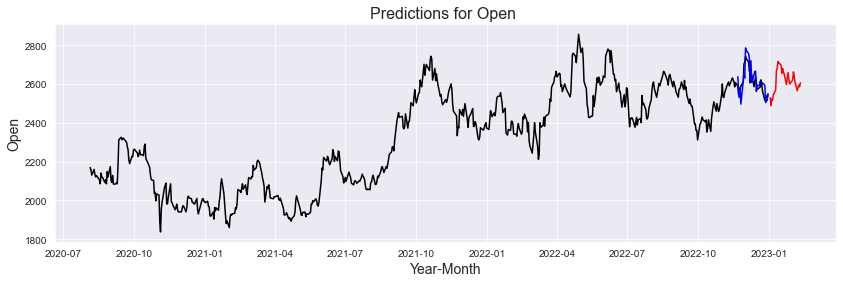

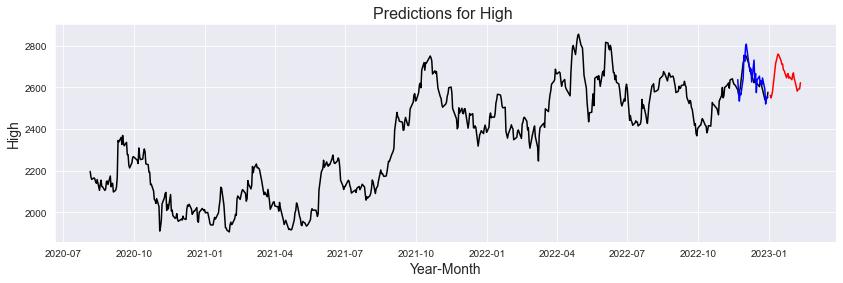

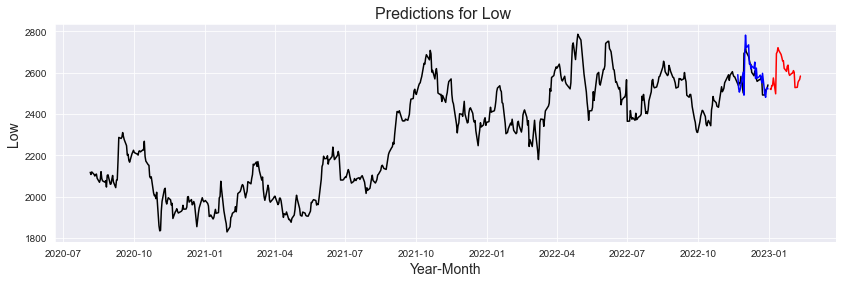

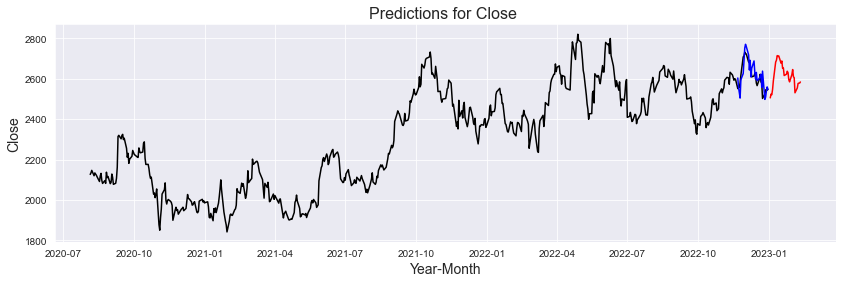

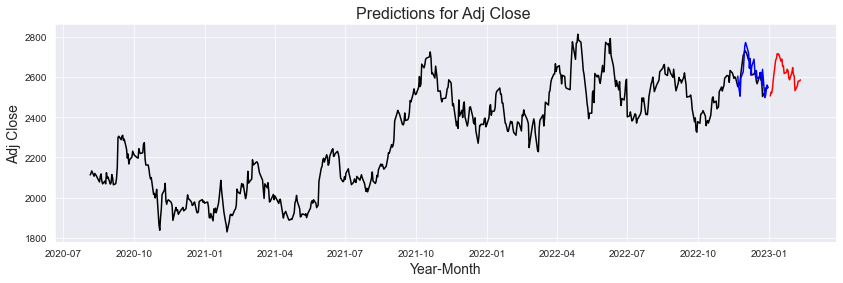

In [161]:
col = ['Open', 'High', 'Low', 'Close', 'Adj Close']

for i in col:
    plt.figure(figsize = (14,4))
    plt.plot(stock['Date'].iloc[-600:], stock[i].iloc[-600:], color = 'black')
    plt.plot(predictions_indexed['Date'], predictions_indexed[i], color = 'blue')
    plt.plot(forecast_indexed['Date'], forecast_indexed[i], color = 'red')
    plt.ylabel('%s'%i, fontsize = 14)
    plt.xlabel('Year-Month', fontsize = 14)
    plt.title('Predictions for %s '%i, fontsize = 16 )

## Holt Winter's Exponential Smoothing 

In [162]:
# Split the data into train and test sets
col = ['Open', 'High', 'Low', 'Close', 'Adj Close']
split = int(len(stock)*0.8)
train_stock = pd.DataFrame()
test_stock = pd.DataFrame()

for i in col:
    train_stock[i] = stock[i].iloc[0:split]
    test_stock[i] = stock[i].iloc[split:]

In [220]:
from statsmodels.tsa.holtwinters import  ExponentialSmoothing

rmse_result_hwe = list()
mape_result_hwe = list()
predictions_hwe = pd.DataFrame()
smoothing_df = pd.DataFrame()

alpha = np.arange(0.1,1,0.99/10) 
beta = np.arange(0.1,1,0.99/10)
delta = np.arange(0.1,1,0.99/10)


col = ['Open', 'High', 'Low', 'Close', 'Adj Close']

for k in col:
    best_score = float('inf')
    for i in alpha:
            for j in beta:
                for d in delta:
                    model_hwe =  ExponentialSmoothing(train_stock[k], damped_trend=True,
                                                      trend = 'add', 
                            seasonal = 'mul', seasonal_periods = 30).fit(smoothing_level = i,
                                                smoothing_trend = j, smoothing_seasonal = d)

                    pred_hwe = model_hwe.predict(start = test_stock.index[0], 
                                                 end = test_stock.index[-1])
                    
                    score_hwe = MAPE(pred_hwe, test_stock[k])
                    rmse_hwe = np.sqrt(mean_squared_error(test_stock[k], pred_hwe))
                    
#                     print('Smoothing Level: ',np.round(i,3),', Smoothing Trend: ',np.round(j,3),
#                     ', Smoothing Seasonal:',np.round(d,3),', MAPE: ',np.round(score_hwe,3),
#                     ', RMSE: ',np.round(rmse_hwe,3))

                    if score_hwe<best_score:                
                        best_score = score_hwe
                        rmse_best = rmse_hwe
                        smooth_level = i
                        smooth_trend = j
                        smooth_seasonal = d
                        best_pred = pred_hwe 

    rmse_result_hwe.append(rmse_best)
    mape_result_hwe.append(best_score)
    predictions_hwe[k] = best_pred
    temp_smooth = [smooth_level,smooth_trend,smooth_seasonal] # storing smoothing values for each feature 
    smoothing_df[k] = temp_smooth
    print(best_score)
                
    print('\nBest model for %s has a smoothing level of '%k, np.round(smooth_level,3),', smoothing trend of ',
                      np.round(smooth_trend,3),', smoothing season of ',
                      np.round(smooth_seasonal,3), ', a MAPE of ', np.round(best_score,3) , ' and RMSE of ',
                     np.round(rmse_best,3),'\n')

4.275038540308379

Best model for Open has a smoothing level of  0.298 , smoothing trend of  0.1 , smoothing season of  0.199 , a MAPE of  4.275  and RMSE of  130.225 

4.335727286501587

Best model for High has a smoothing level of  0.1 , smoothing trend of  0.1 , smoothing season of  0.595 , a MAPE of  4.336  and RMSE of  134.937 

4.2402566933667

Best model for Low has a smoothing level of  0.199 , smoothing trend of  0.1 , smoothing season of  0.1 , a MAPE of  4.24  and RMSE of  127.805 

4.2602005799851055

Best model for Close has a smoothing level of  0.1 , smoothing trend of  0.1 , smoothing season of  0.298 , a MAPE of  4.26  and RMSE of  129.087 

4.234467596987781

Best model for Adj Close has a smoothing level of  0.1 , smoothing trend of  0.1 , smoothing season of  0.298 , a MAPE of  4.234  and RMSE of  129.297 



In [193]:
smoothing_df

Open   High    Low  Close  Adj Close
0  0.298  0.100  0.199  0.100      0.100
1  0.100  0.100  0.100  0.100      0.100
2  0.199  0.595  0.100  0.298      0.298

#### Comparision of Predictions against Test Values 

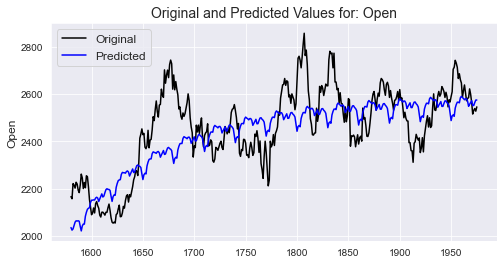

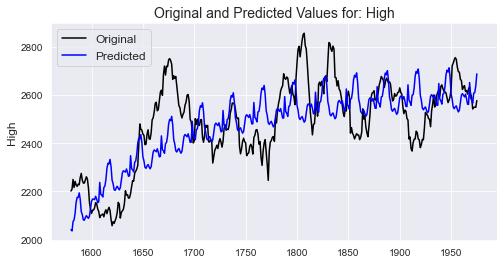

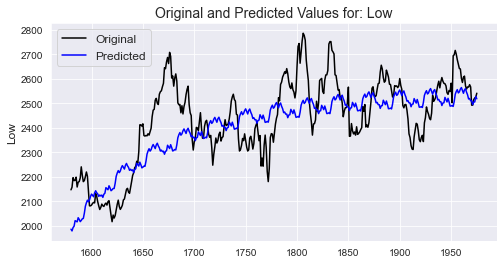

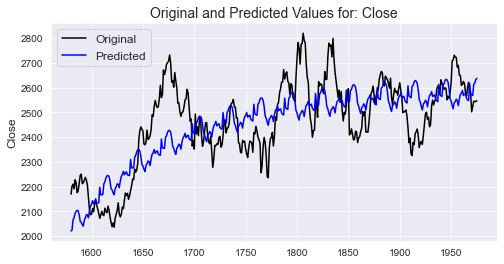

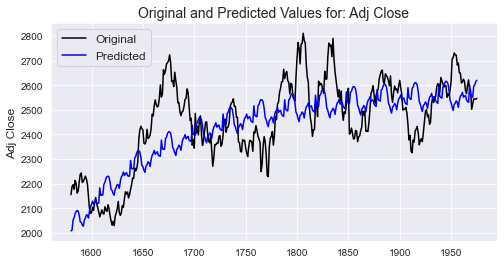

In [194]:
col = ['Open', 'High', 'Low', 'Close', 'Adj Close']
# col = ['Open','High']

for i in col:
    plt.figure(figsize=(8,4))
    plt.plot(stock[i].iloc[-len(predictions_hwe):], color = 'black', label = 'Original')
    plt.plot(predictions_hwe[i], color = 'blue', label = 'Predicted')
    plt.ylabel('%s'%i, fontsize = 12)
    plt.title('Original and Predicted Values for: %s'%i, fontsize = 14)
    plt.legend(loc = 'best', fontsize = 12)
    plt.show()

#### RMSE and MAPE of Values Predicted through Holt Winter's model 

In [195]:
col = ['Open', 'High', 'Low', 'Close', 'Adj Close']
rmse_list_hwe = list()
mape_list_hwe = list()

for i in col:
    rmse_list_hwe.append(sqrt(mean_squared_error(stock[i].iloc[-len(predictions_hwe):], predictions_hwe[i])))
    mape_list_hwe.append(MAPE(predictions_hwe[i], stock[i].iloc[-len(predictions_hwe):]))

error_df_hwe = pd.DataFrame({'RMSE': np.round(rmse_list_hwe,2), 'MAPE' : np.round(mape_list_hwe,2)}, index = ['Open', 'High', 'Low', 'Close', 'Adj Close'])
print('\033[1m'+ 'RMSE and MAPE for Predictions using ARIMA Model')
error_df_hwe

RMSE and MAPE for Predictions using ARIMA Model


RMSE  MAPE
Open       130.23  4.28
High       134.94  4.34
Low        127.81  4.24
Close      129.09  4.26
Adj Close  129.30  4.23

In [201]:
# Adding Date Column to predictions 
date_df_hwe = pd.DataFrame()
date_df_hwe['Date'] = stock['Date'].iloc[-len(predictions_hwe):] 
predictions_hwe.insert(0,'Date', date_df_hwe['Date'])

#### Forecasting for a Month

In [210]:
forecast_hwe = pd.DataFrame()
col = ['Open', 'High', 'Low', 'Close', 'Adj Close']
days_hwe = 30
for i in col:
    model_hwe =  ExponentialSmoothing(stock[i], damped_trend=True,trend = 'add',seasonal = 'mul',
                 seasonal_periods = 30).fit(smoothing_level = smoothing_df[i][0],
                 smoothing_trend = smoothing_df[i][1], smoothing_seasonal = smoothing_df[i][2])
    forecast_hwe[i] = model_hwe.forecast(steps = days_hwe)

In [209]:
smoothing_df['High'][0], smoothing_df['High'][1], smoothing_df['High'][2]

(0.1, 0.1, 0.595)

In [211]:
# Adding Date Column to predictions 
date_df_fc_hwe = pd.DataFrame()
date_df_fc_hwe['Date'] = pd.date_range(stock['Date'].iloc[-1], periods = days_hwe+1, freq = 'B')
date_df_fc_hwe.drop(date_df_fc_hwe.index[0], inplace = True) # includes start date, so we drop it
indexing_fc_hwe = pd.Index(range(len(stock),len(stock)+len(forecast_hwe)))
date_df_fc_hwe.set_index(indexing_fc_hwe, inplace = True) # reset the index to start after the last date of stock dataframe
forecast_hwe.insert(0,'Date', date_df_fc_hwe['Date'])

#### Visualizing the Forecast 

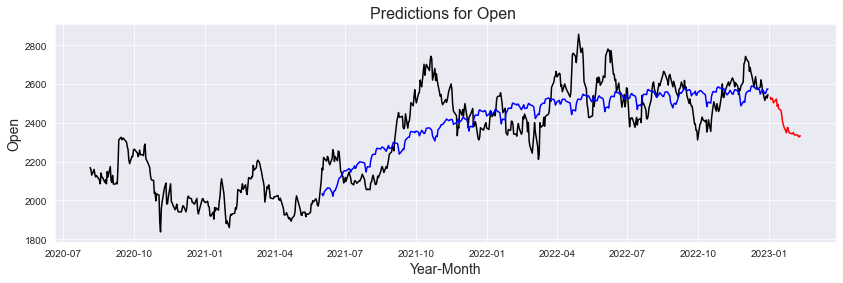

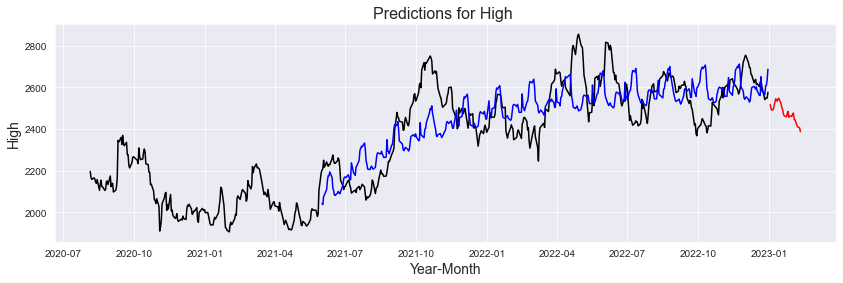

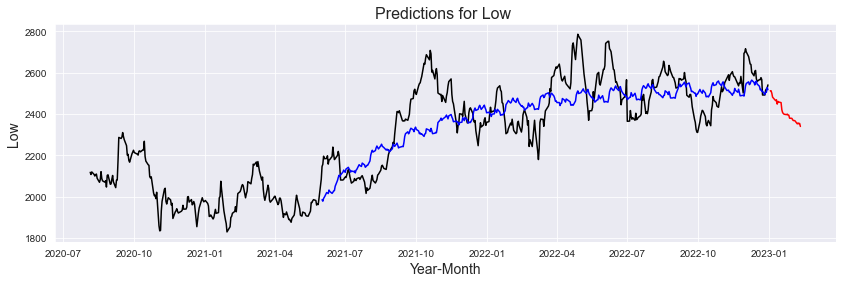

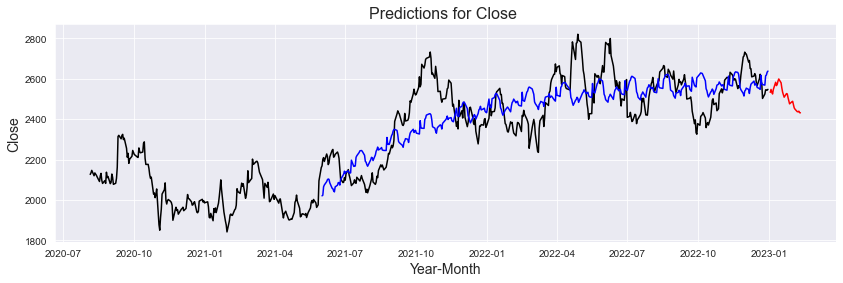

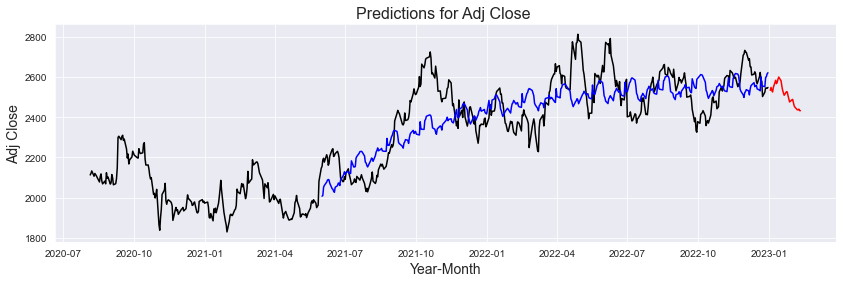

In [212]:
col = ['Open', 'High', 'Low', 'Close', 'Adj Close']

for i in col:
    plt.figure(figsize = (14,4))
    plt.plot(stock['Date'].iloc[-600:], stock[i].iloc[-600:], color = 'black')
    plt.plot(predictions_hwe['Date'], predictions_hwe[i], color = 'blue')
    plt.plot(forecast_hwe['Date'], forecast_hwe[i], color = 'red')
    plt.ylabel('%s'%i, fontsize = 14)
    plt.xlabel('Year-Month', fontsize = 14)
    plt.title('Predictions for %s '%i, fontsize = 16 )